# **Default of Credit Card Clients**

### **Name : Sreeraj S**
### **Organization : Entri Elevate**
### **Date :** [Evaluation Date]

______

## **1. Overview of Problem Statement:**

This project is aimed at predicting the case of customers default payments in Taiwan. With the rise of credit card issuance, banks overextended credit to unqualified applicants, leading to excessive debt accumulation and increased defaults. This crisis impacted consumer confidence and posed challenges for both banks and cardholders.

Effective risk prediction is essential for minimizing financial uncertainty. By analyzing customer transactions, repayment history, and financial data, this project aims to build an automated model to predict credit card defaults. Identifying high-risk customers allows banks to take preventive measures, such as offering alternative repayment options, to reduce potential losses.

## **2. Objective:**
* To compare the predictive accuracy of default probability across multiple machine learning models.

* To assess the effectiveness of different models in estimating the true probability of default rather than just classifying clients into default and non-default groups.

## **3. Data Description:**
### Source:
**Dataset link:** https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

### Data Description 
* ID: ID of each client
  
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
  
* SEX: Gender (1 = male, 2 = female)
  
* EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)
  
* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)
  
* AGE: Age in years

**Scale for PAY_0 to PAY_6 :** (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_0: Repayment status in September, 2005 (scale same as above)
  
* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

* default.payment.next.month: Default payment (1=yes, 0=no)





## **4. Data Collection**

#### Importing Libraries

In [13]:
# Importing libraries. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#### Dataset Loading

In [193]:
df=pd.read_csv('default of credit card clients.csv')
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0         -1     -2     -2       3913       3102        689          0   
1          0      0      2       2682       1725       2682       3272   
2          0      0      0      29239      14027      13559      14331   
3          0      0      0      46990      48233      49291      28314   
4          0      0      0       8617       5670      35835      20940   
...      ...    ...    ...        ...        ...        ...        ...   
29995      0      0      0     188948     192815     208365      88004   
29996     -1      0      0       1683       1828       3502       8979   
29997     -1      0      0       3565       3356       2758      20878   
29998      0      0     -1      -1645      78379      76304      52774   
29999      0      0      0      47929      48905      49764      36535   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0              0          0         0       689         0         0         0   
1           3455       3261         0      1000      1000      1000         0   
2          14948      15549      1518      1500      1000      1000      1000   
3          28959      29547      2000      2019      1200      1100      1069   
4          19146      19131      2000     36681     10000      9000       689   
...          ...        ...       ...       ...       ...       ...       ...   
29995      31237      15980      8500     20000      5003      3047      5000   
29996       5190          0      1837      3526      8998       129         0   
29997      20582      19357         0         0     22000      4200      2000   
29998      11855      48944     85900      3409      1178      1926     52964   
29999      32428      15313      2078      1800      1430      1000      1000   

       PAY_AMT6  default payment next month  
0             0                           1  
1          2000                           1  
2          5000                           0  
3          1000                           0  
4           679                           0  
...         ...                         ...  
29995      1000                           0  
29996         0                           0  
29997      3100                           1  
29998      1804                           1  
29999      1000                           1  

[30000 rows x 25 columns]

#### Total No.Of Rows And Columns

In [17]:
df.shape

(30000, 25)

##### *To avoid confusion, the target column "default payment next month" has been renamed to "Default", and "PAY_0" has been renamed to "PAY_1".*

In [19]:
df.rename(columns={'default payment next month' : 'Is_Defaulter'}, inplace=True)
df.rename(columns={'PAY_0' : 'PAY_1'},inplace=True)

In [20]:
pd.set_option('display.max_columns',None)

#### First Five Rows

In [22]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   Is_Defaulter  
0             1  
1             1  
2             0  
3             0  
4             0

#### Last Five Rows

In [24]:
df.tail()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
29995      0      0      0     188948     192815     208365      88004   
29996     -1      0      0       1683       1828       3502       8979   
29997     -1      0      0       3565       3356       2758      20878   
29998      0      0     -1      -1645      78379      76304      52774   
29999      0      0      0      47929      48905      49764      36535   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
29995      31237      15980      8500     20000      5003      3047      5000   
29996       5190          0      1837      3526      8998       129         0   
29997      20582      19357         0         0     22000      4200      2000   
29998      11855      48944     85900      3409      1178      1926     52964   
29999      32428      15313      2078      1800      1430      1000      1000   

       PAY_AMT6  Is_Defaulter  
29995      1000             0  
29996         0             0  
29997      3100             1  
29998      1804             1  
29999      1000             1

#### About Columns

In [26]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Is_Defaulter'],
      dtype='object')

#### Data Info

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            30000 non-null  int64
 1   LIMIT_BAL     30000 non-null  int64
 2   SEX           30000 non-null  int64
 3   EDUCATION     30000 non-null  int64
 4   MARRIAGE      30000 non-null  int64
 5   AGE           30000 non-null  int64
 6   PAY_1         30000 non-null  int64
 7   PAY_2         30000 non-null  int64
 8   PAY_3         30000 non-null  int64
 9   PAY_4         30000 non-null  int64
 10  PAY_5         30000 non-null  int64
 11  PAY_6         30000 non-null  int64
 12  BILL_AMT1     30000 non-null  int64
 13  BILL_AMT2     30000 non-null  int64
 14  BILL_AMT3     30000 non-null  int64
 15  BILL_AMT4     30000 non-null  int64
 16  BILL_AMT5     30000 non-null  int64
 17  BILL_AMT6     30000 non-null  int64
 18  PAY_AMT1      30000 non-null  int64
 19  PAY_AMT2      30000 non-n

#### Data Description

In [30]:
df.describe().T

count           mean            std       min       25%  \
ID            30000.0   15000.500000    8660.398374       1.0   7500.75   
LIMIT_BAL     30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX           30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION     30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE      30000.0       1.551867       0.521970       0.0      1.00   
AGE           30000.0      35.485500       9.217904      21.0     28.00   
PAY_1         30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2         30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3         30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4         30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5         30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6         30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT1     30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2     30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3     30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4     30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5     30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6     30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1      30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2      30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3      30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4      30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT5      30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT6      30000.0    5215.502567   17777.465775       0.0    117.75   
Is_Defaulter  30000.0       0.221200       0.415062       0.0      0.00   

                   50%        75%        max  
ID             15000.5   22500.25    30000.0  
LIMIT_BAL     140000.0  240000.00  1000000.0  
SEX                2.0       2.00        2.0  
EDUCATION          2.0       2.00        6.0  
MARRIAGE           2.0       2.00        3.0  
AGE               34.0      41.00       79.0  
PAY_1              0.0       0.00        8.0  
PAY_2              0.0       0.00        8.0  
PAY_3              0.0       0.00        8.0  
PAY_4              0.0       0.00        8.0  
PAY_5              0.0       0.00        8.0  
PAY_6              0.0       0.00        8.0  
BILL_AMT1      22381.5   67091.00   964511.0  
BILL_AMT2      21200.0   64006.25   983931.0  
BILL_AMT3      20088.5   60164.75  1664089.0  
BILL_AMT4      19052.0   54506.00   891586.0  
BILL_AMT5      18104.5   50190.50   927171.0  
BILL_AMT6      17071.0   49198.25   961664.0  
PAY_AMT1        2100.0    5006.00   873552.0  
PAY_AMT2        2009.0    5000.00  1684259.0  
PAY_AMT3        1800.0    4505.00   896040.0  
PAY_AMT4        1500.0    4013.25   621000.0  
PAY_AMT5        1500.0    4031.50   426529.0  
PAY_AMT6        1500.0    4000.00   528666.0  
Is_Defaulter       0.0       0.00        1.0

In [31]:
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [32]:
df['Is_Defaulter'].value_counts()

Is_Defaulter
0    23364
1     6636
Name: count, dtype: int64

## **5.Data Preprocessing - Data Cleaning**

In [34]:
df.duplicated().sum()

0

In [35]:
print("Missing values in each column:\n")
df.isnull().sum()

Missing values in each column:



ID              0
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_1           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
Is_Defaulter    0
dtype: int64

**Dataset does not contains any NA values, null values and duplicates****

In [37]:
#Dropping ID Column
df = df.drop(['ID'], axis=1)

In [38]:
num_data= df.select_dtypes('number')
num_data

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0         -2     -2       3913       3102        689          0          0   
1          0      2       2682       1725       2682       3272       3455   
2          0      0      29239      14027      13559      14331      14948   
3          0      0      46990      48233      49291      28314      28959   
4          0      0       8617       5670      35835      20940      19146   
...      ...    ...        ...        ...        ...        ...        ...   
29995      0      0     188948     192815     208365      88004      31237   
29996      0      0       1683       1828       3502       8979       5190   
29997      0      0       3565       3356       2758      20878      20582   
29998      0     -1      -1645      78379      76304      52774      11855   
29999      0      0      47929      48905      49764      36535      32428   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0              0         0       689         0         0         0         0   
1           3261         0      1000      1000      1000         0      2000   
2          15549      1518      1500      1000      1000      1000      5000   
3          29547      2000      2019      1200      1100      1069      1000   
4          19131      2000     36681     10000      9000       689       679   
...          ...       ...       ...       ...       ...       ...       ...   
29995      15980      8500     20000      5003      3047      5000      1000   
29996          0      1837      3526      8998       129         0         0   
29997      19357         0         0     22000      4200      2000      3100   
29998      48944     85900      3409      1178      1926     52964      1804   
29999      15313      2078      1800      1430      1000      1000      1000   

       Is_Defaulter  
0                 1  
1                 1  
2                 0  
3                 0  
4                 0  
...             ...  
29995             0  
29996             0  
29997             1  
29998             1  
29999             1  

[30000 rows x 24 columns]

In [39]:
numeric_columns=list(num_data)
numeric_columns

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Is_Defaulter']

In [40]:
num_data.skew()

LIMIT_BAL        0.992867
SEX             -0.424183
EDUCATION        0.970972
MARRIAGE        -0.018742
AGE              0.732246
PAY_1            0.731975
PAY_2            0.790565
PAY_3            0.840682
PAY_4            0.999629
PAY_5            1.008197
PAY_6            0.948029
BILL_AMT1        2.663861
BILL_AMT2        2.705221
BILL_AMT3        3.087830
BILL_AMT4        2.821965
BILL_AMT5        2.876380
BILL_AMT6        2.846645
PAY_AMT1        14.668364
PAY_AMT2        30.453817
PAY_AMT3        17.216635
PAY_AMT4        12.904985
PAY_AMT5        11.127417
PAY_AMT6        10.640727
Is_Defaulter     1.343504
dtype: float64

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

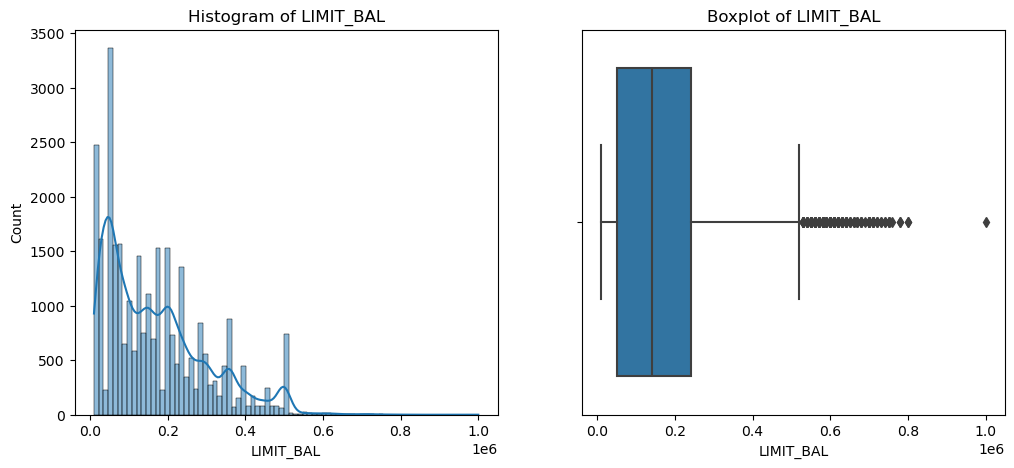

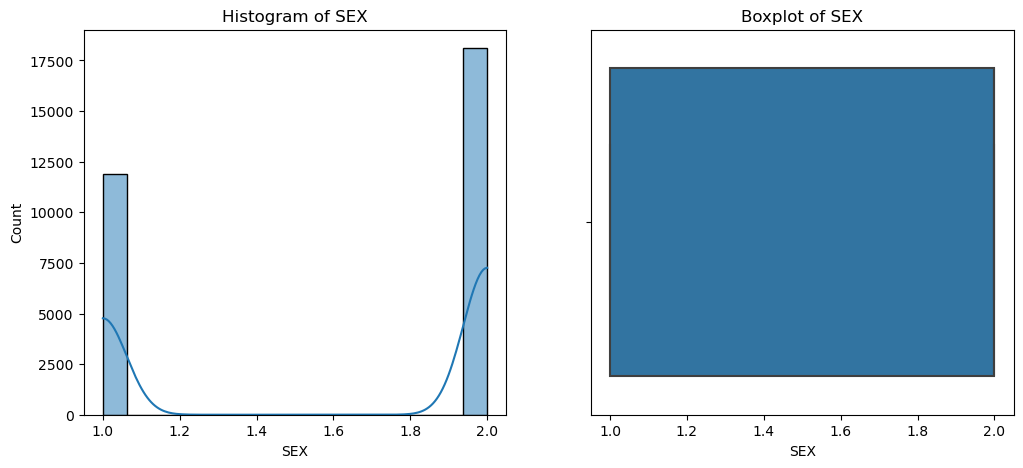

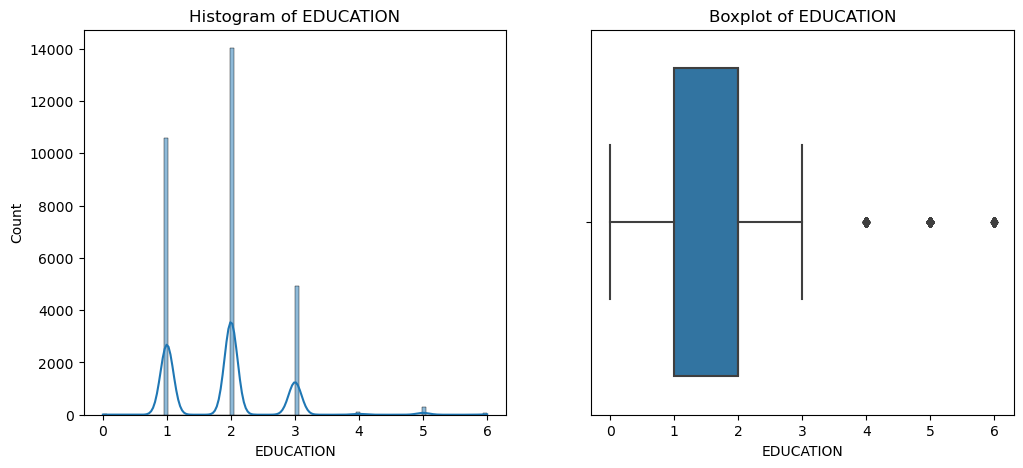

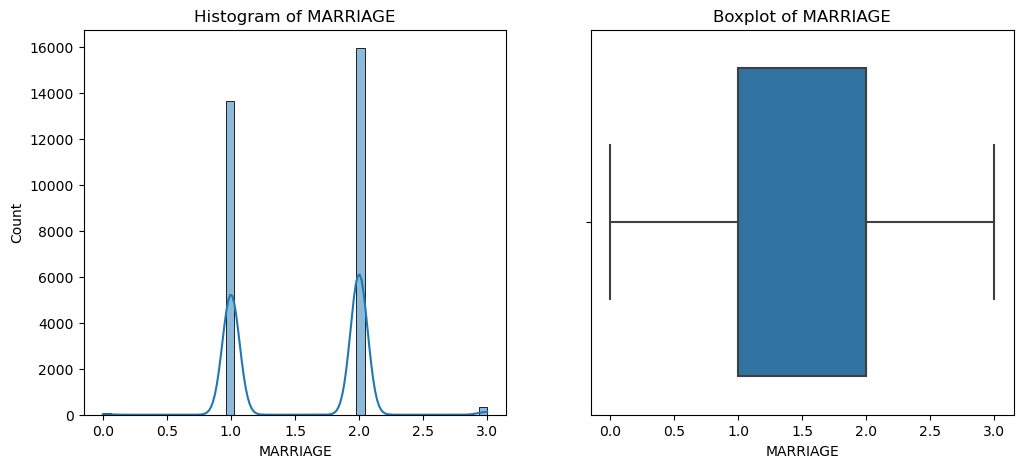

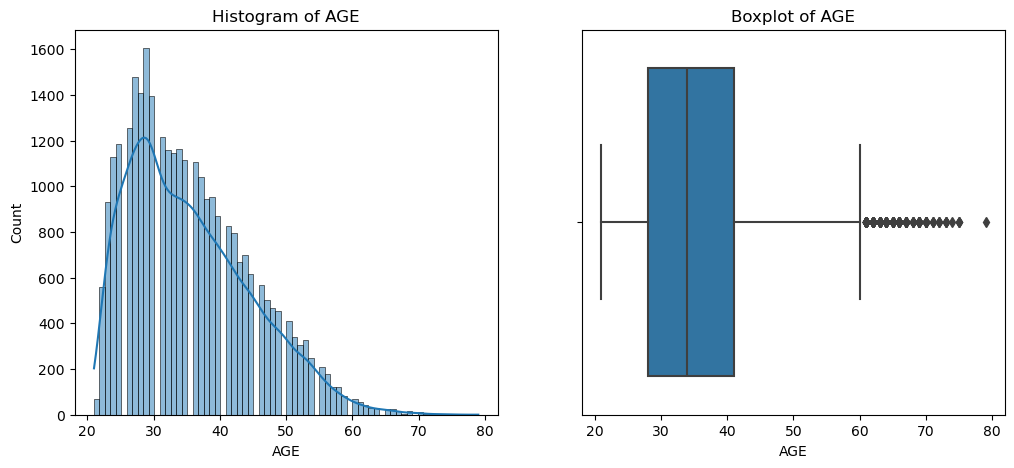

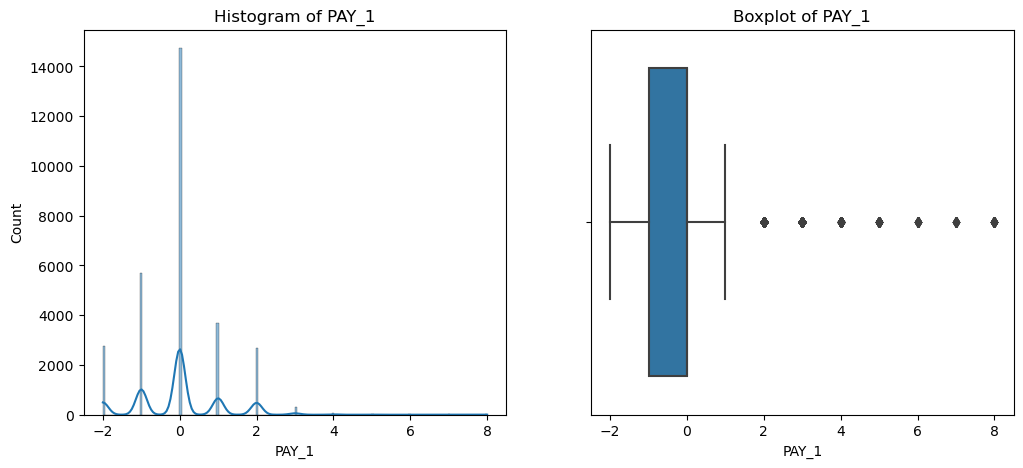

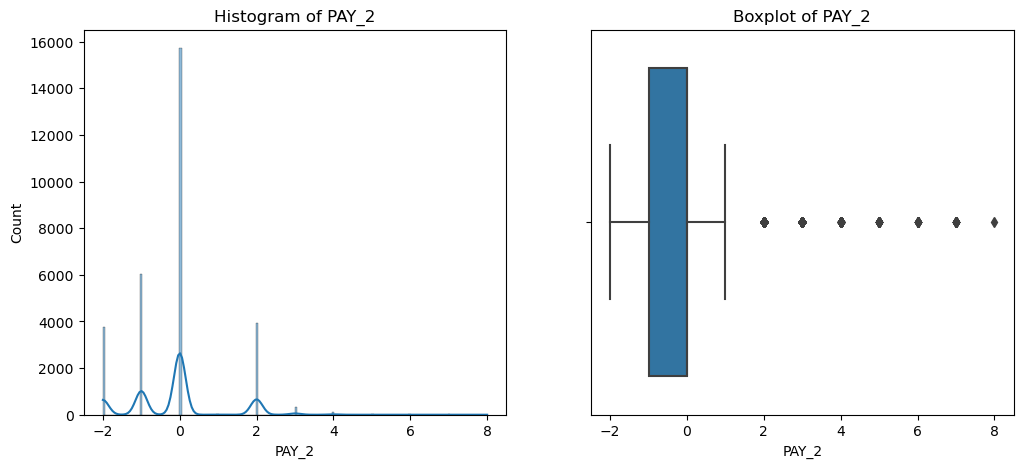

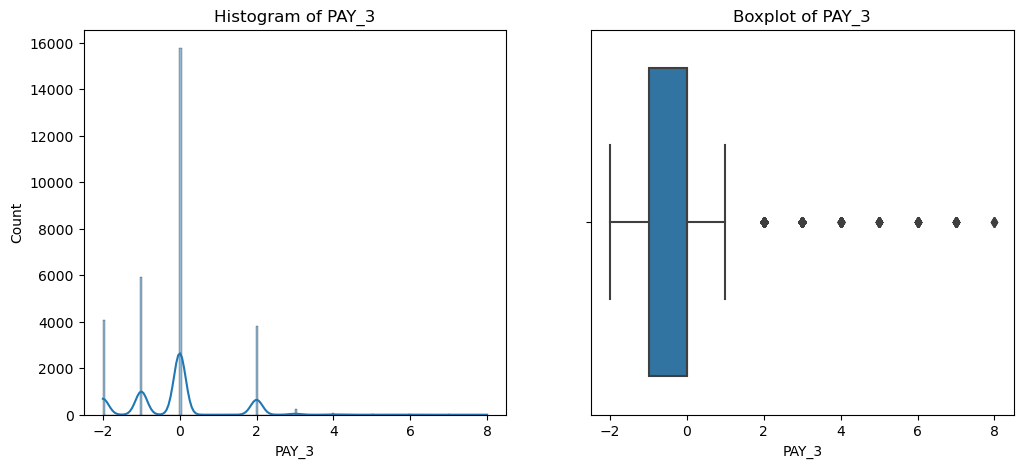

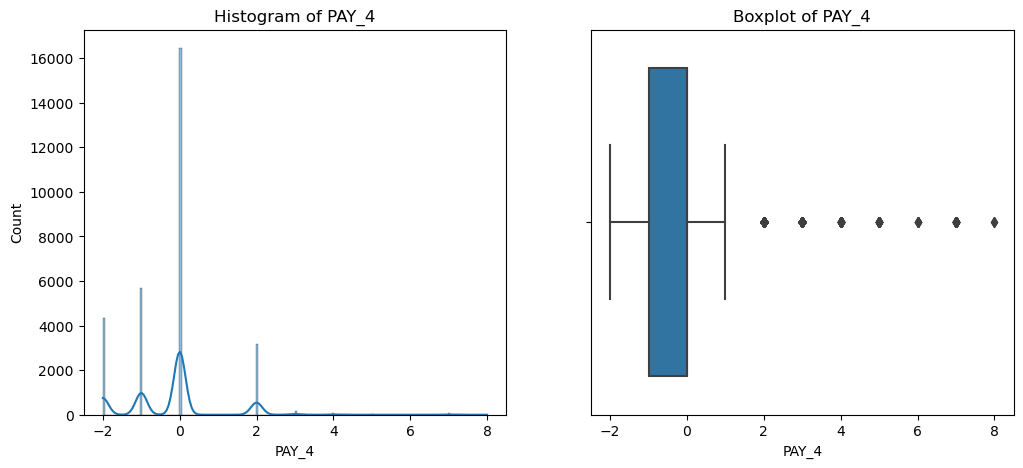

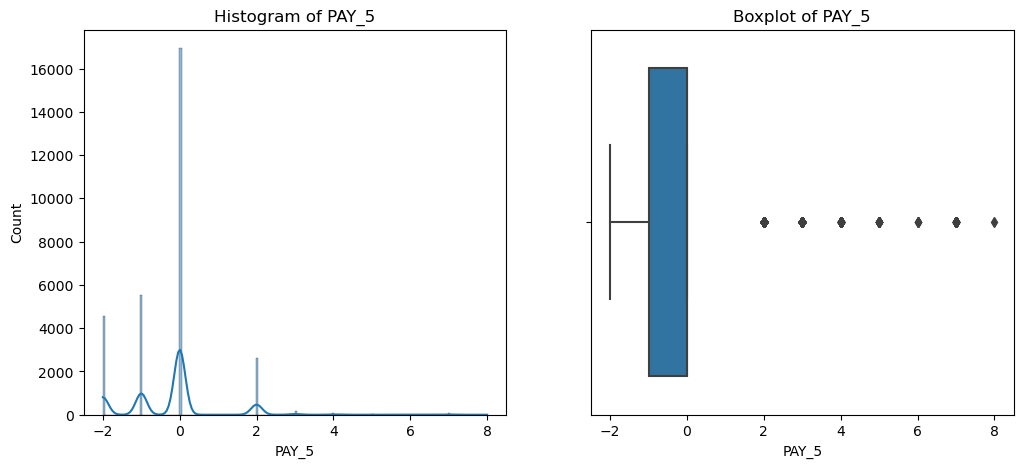

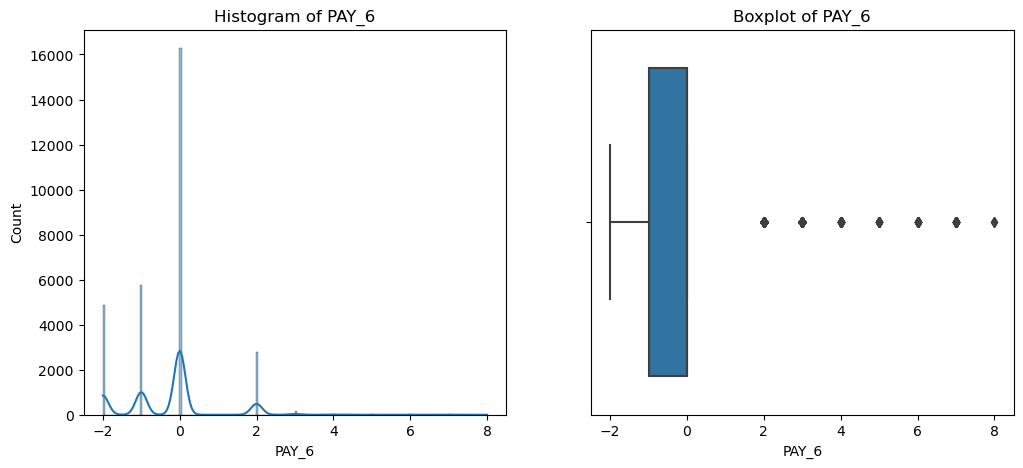

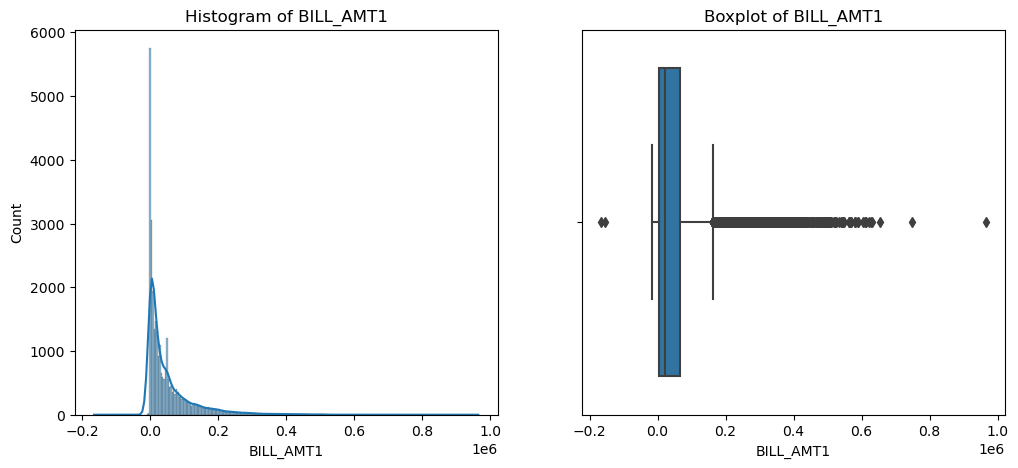

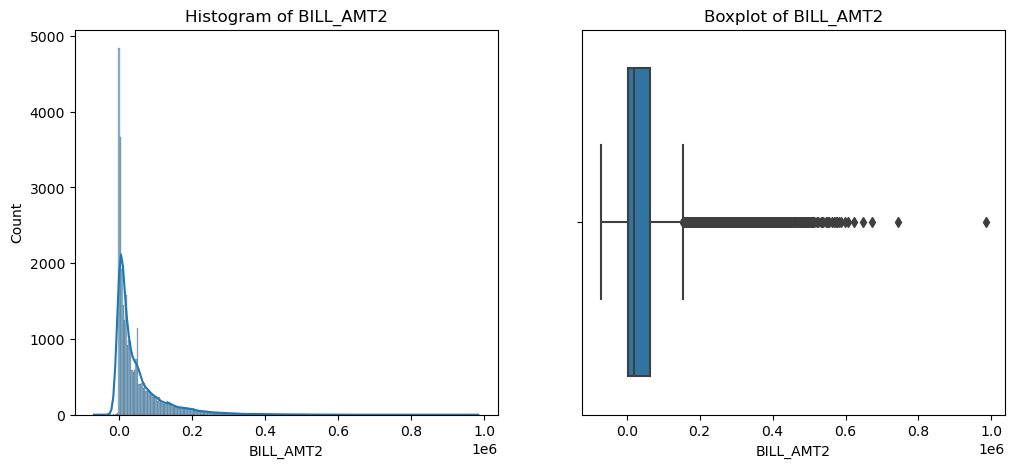

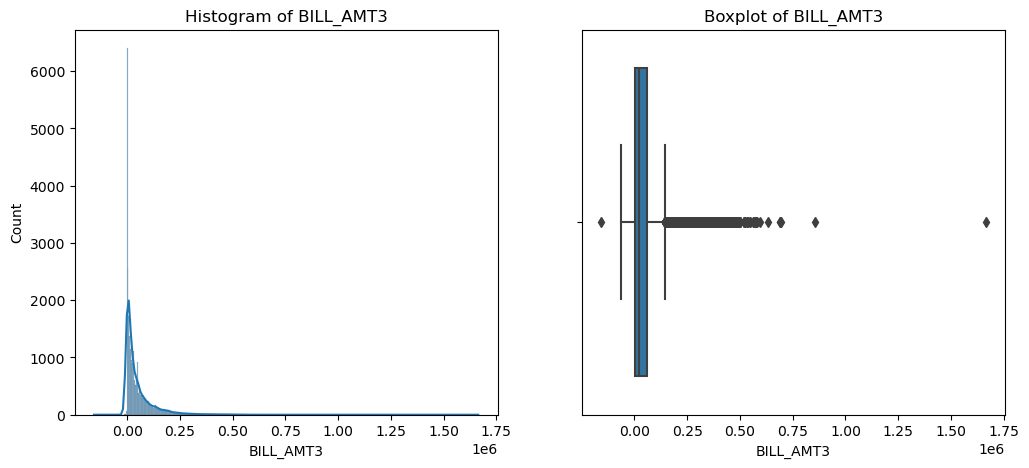

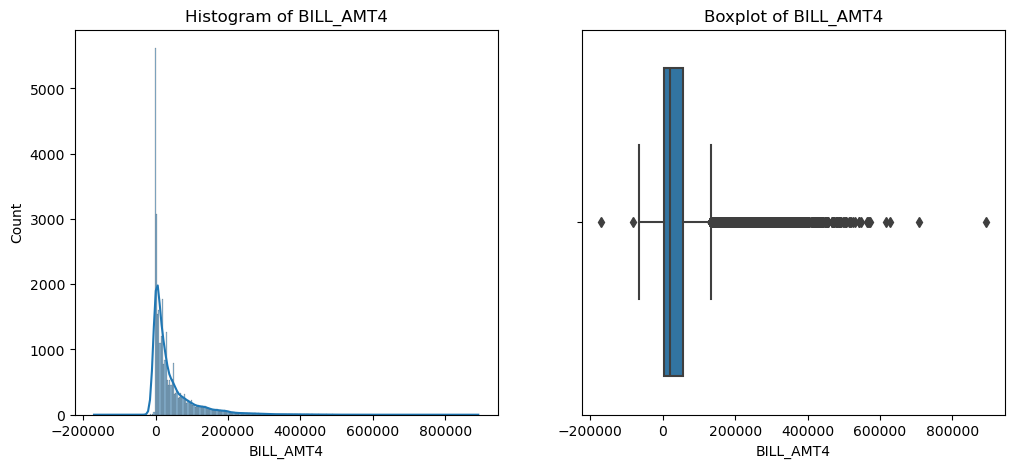

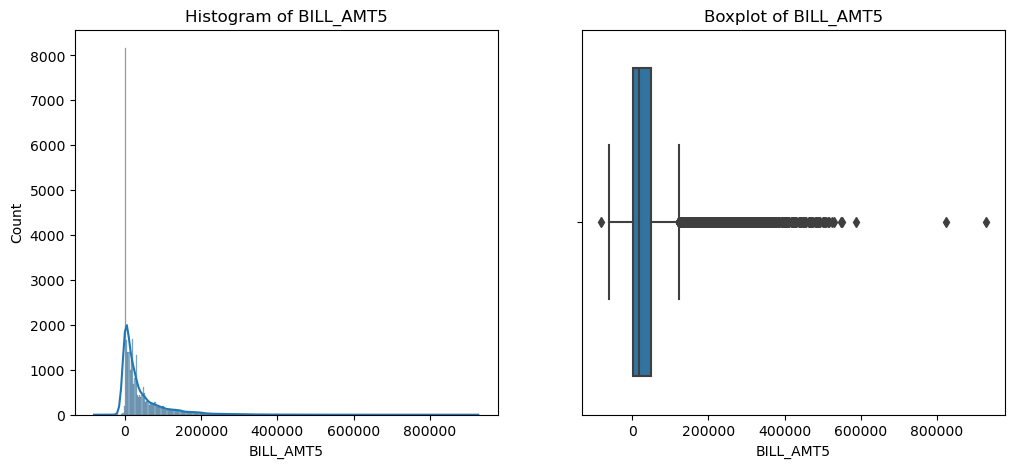

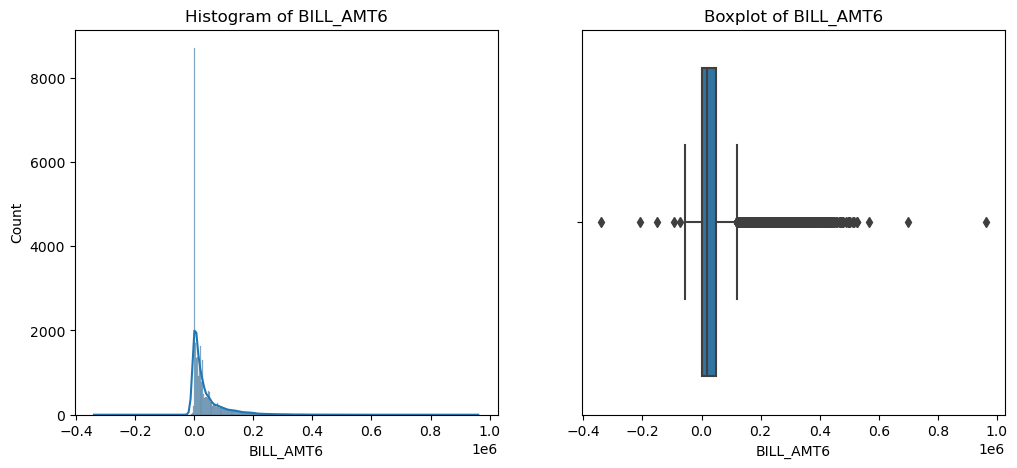

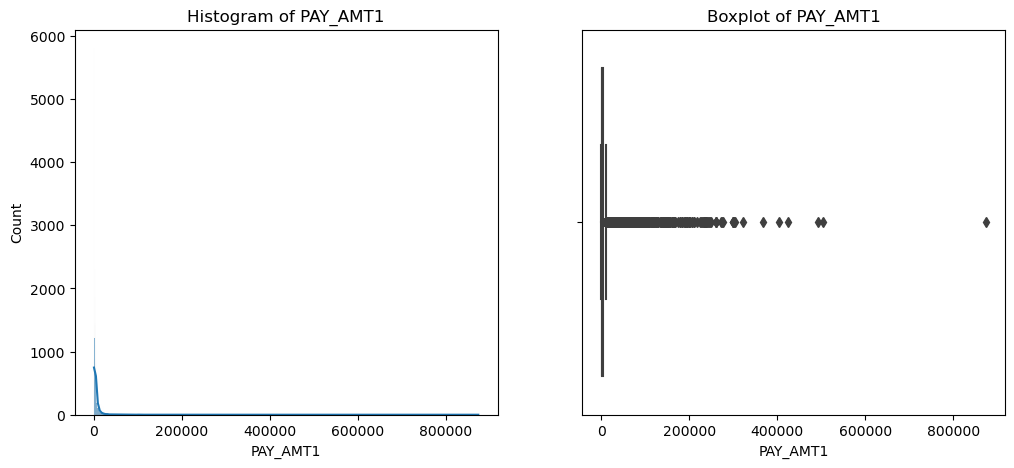

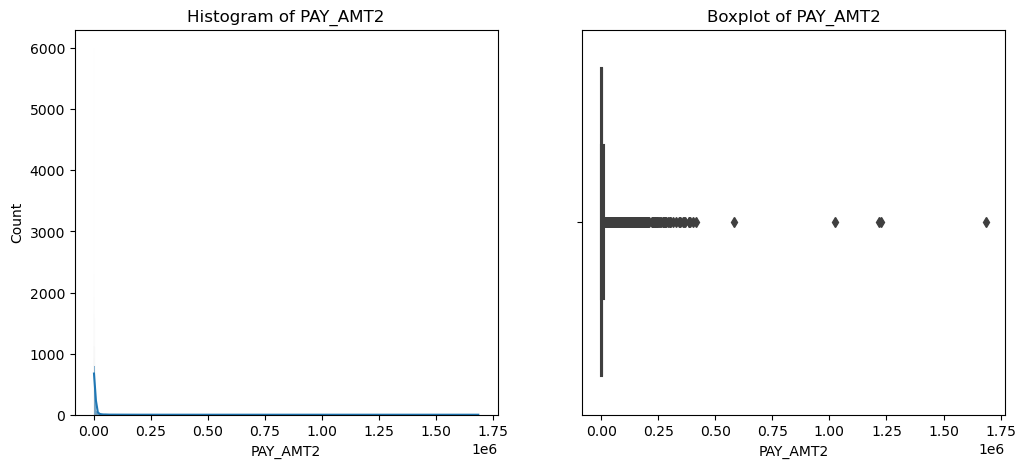

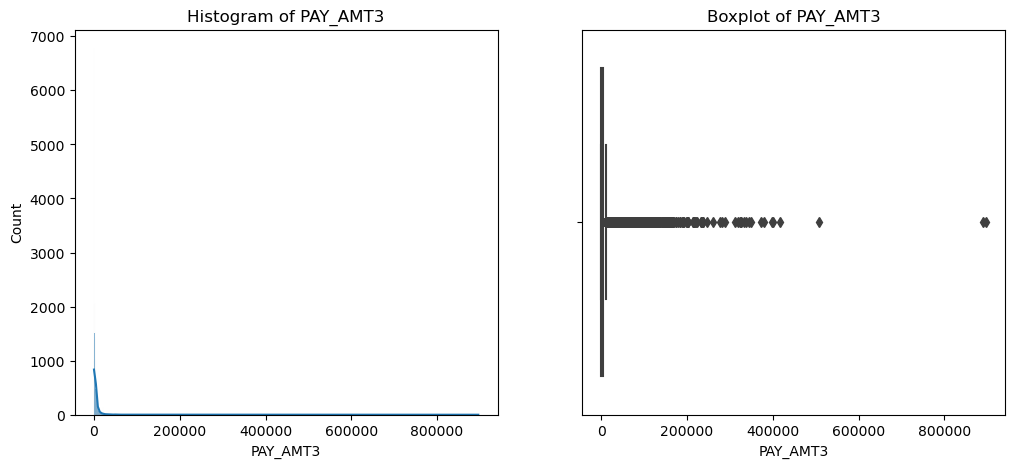

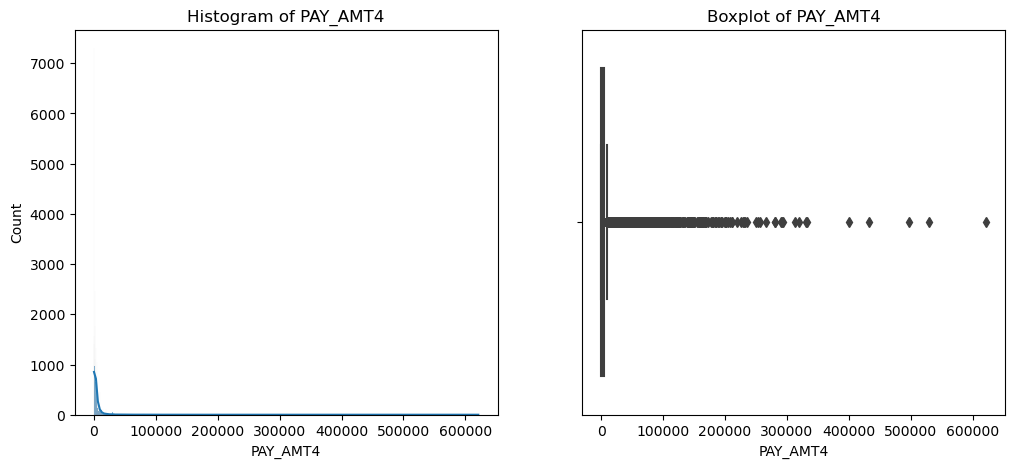

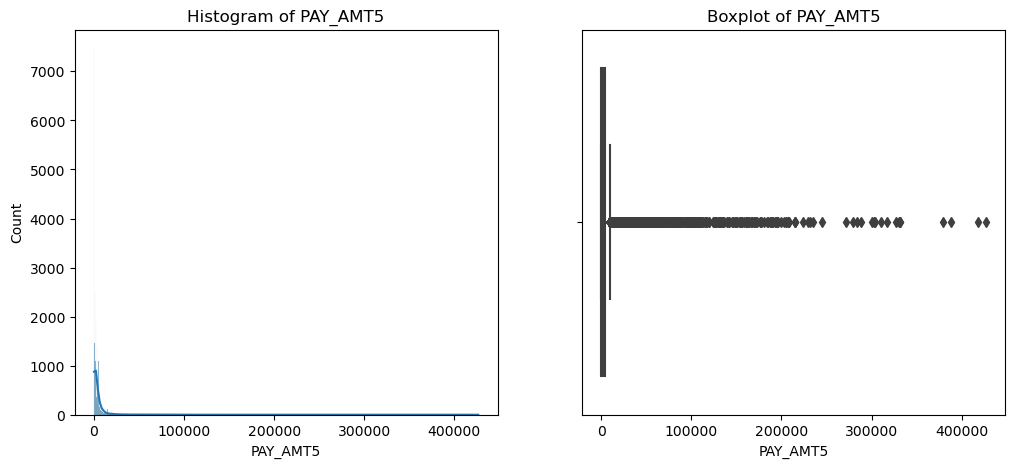

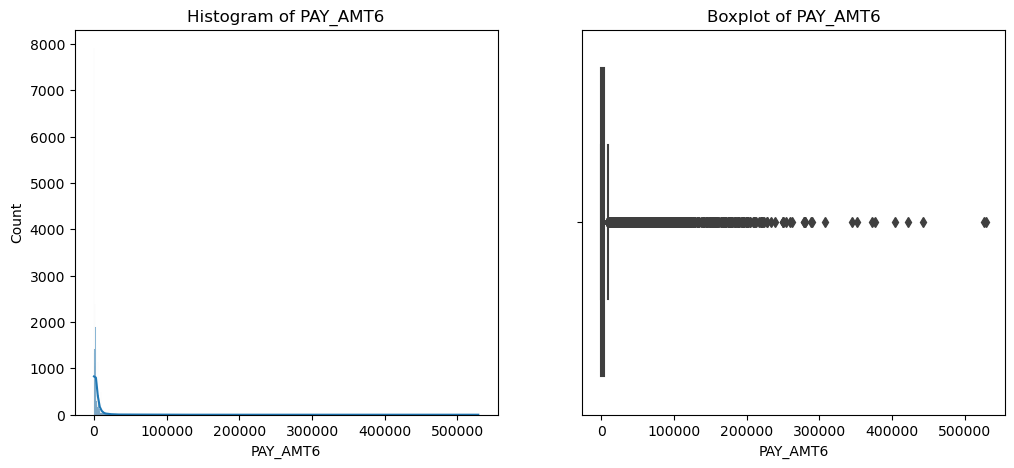

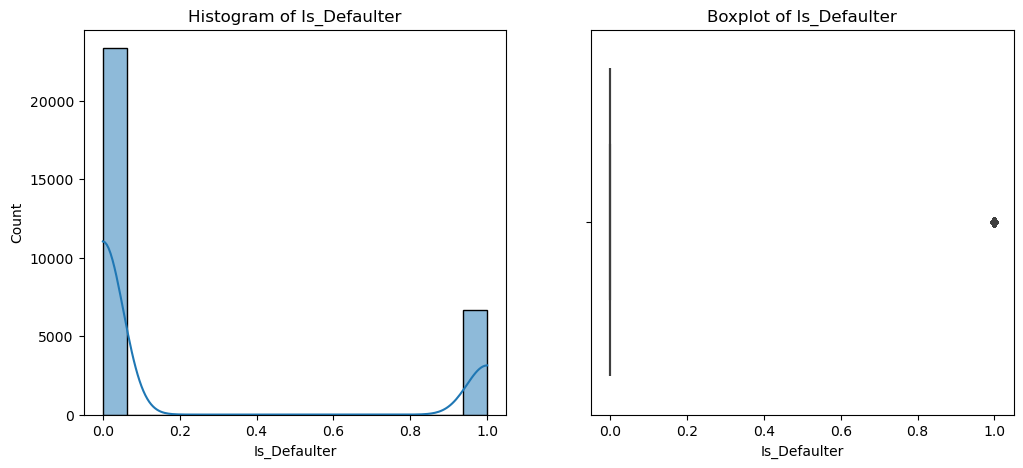

In [41]:
for column in numeric_columns:
    plt.figure(figsize=(12,5))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[column],kde=True)
    plt.title(f'Histogram of {column}')

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

<Axes: >

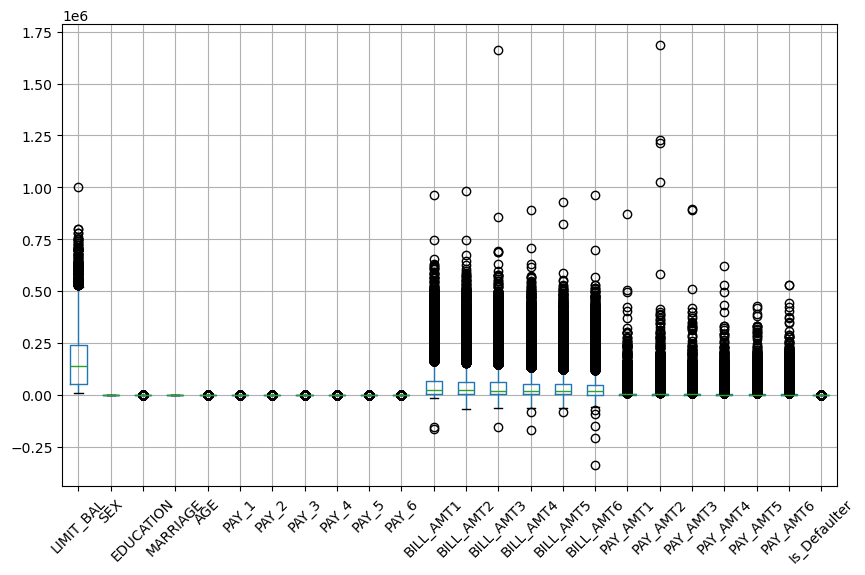

In [42]:
df.boxplot(figsize = (10,6),rot = 45)

#### *The dataset has skewness, so we must handle it.*

### Handling Outliers

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


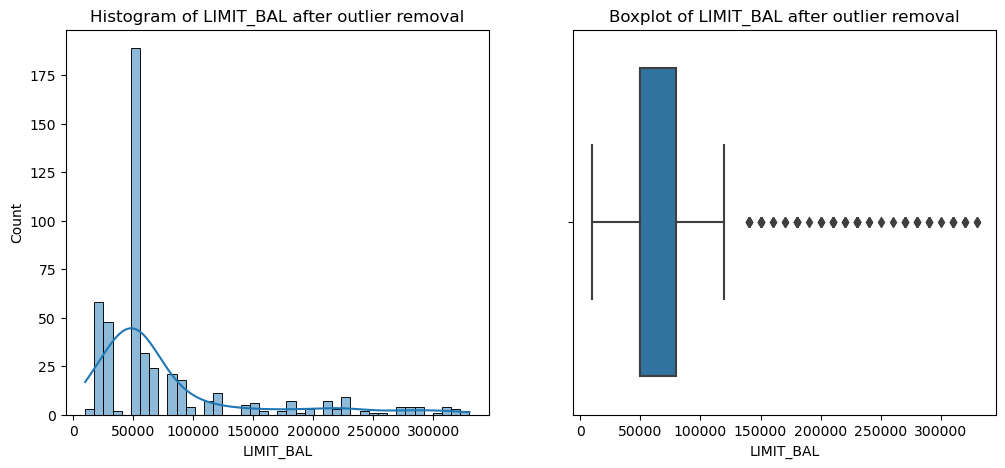

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


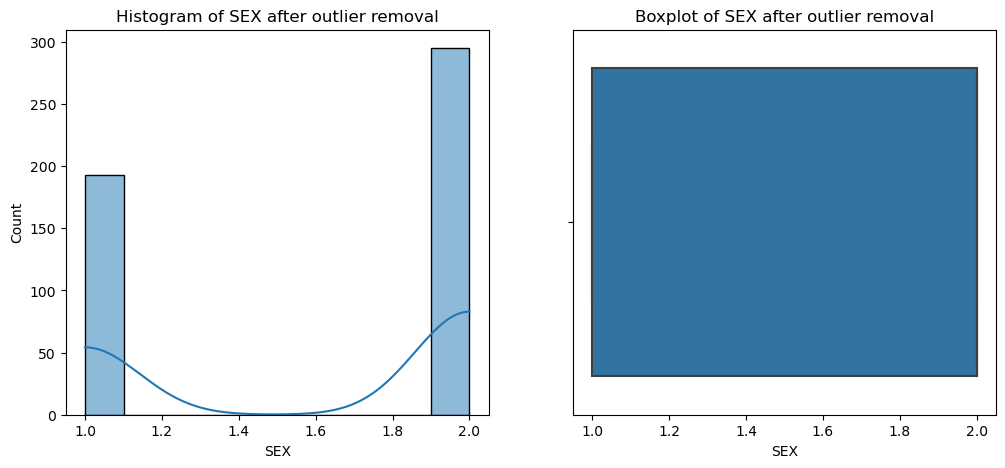

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


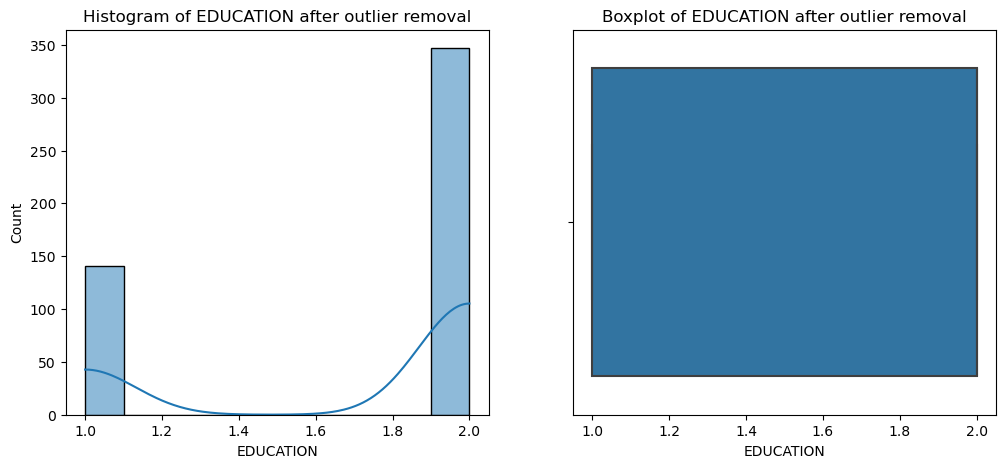

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


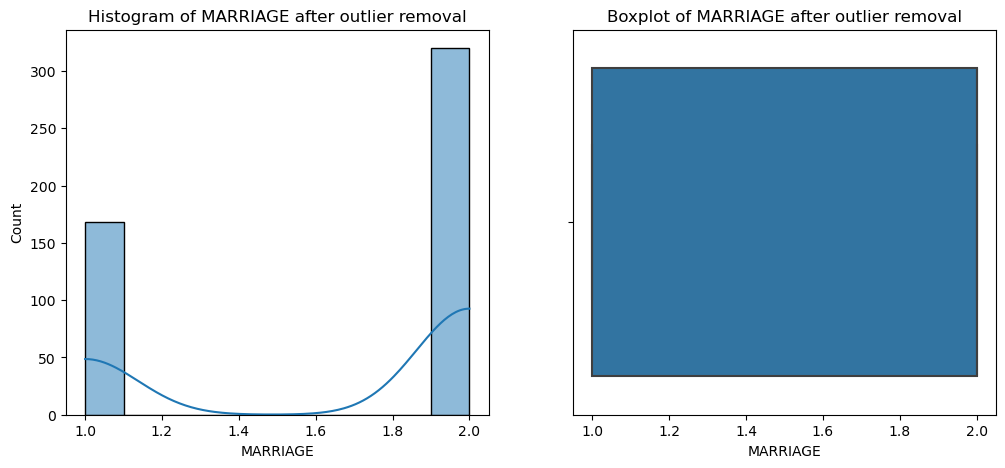

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


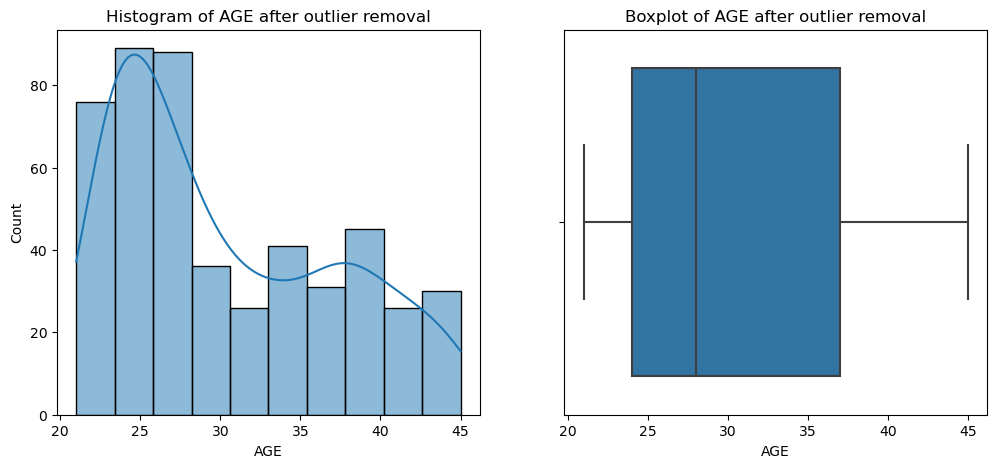

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


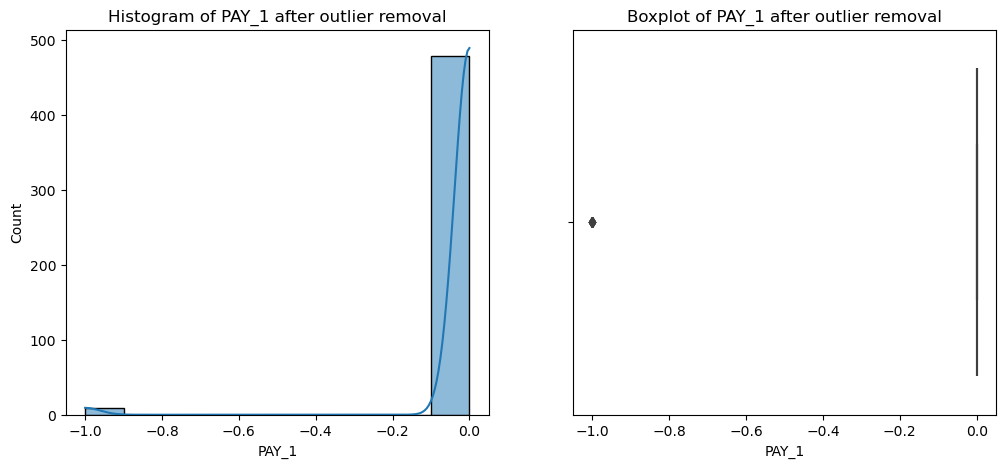

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


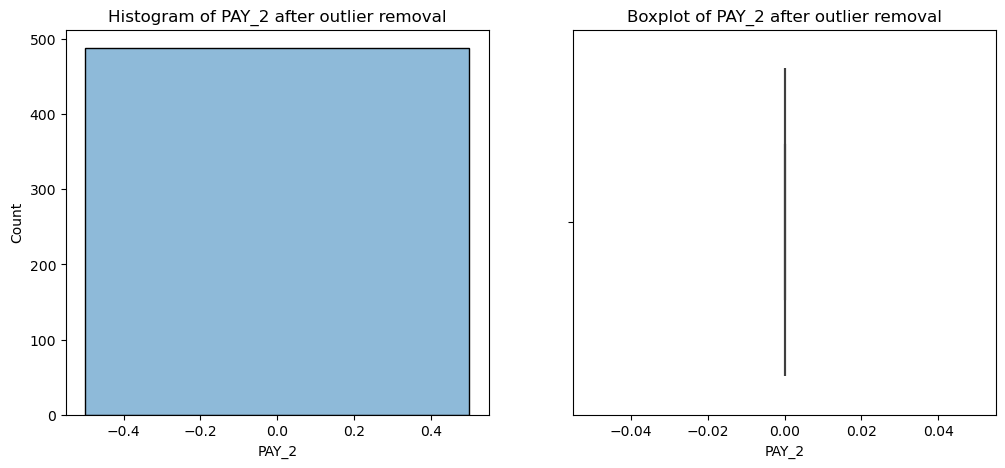

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


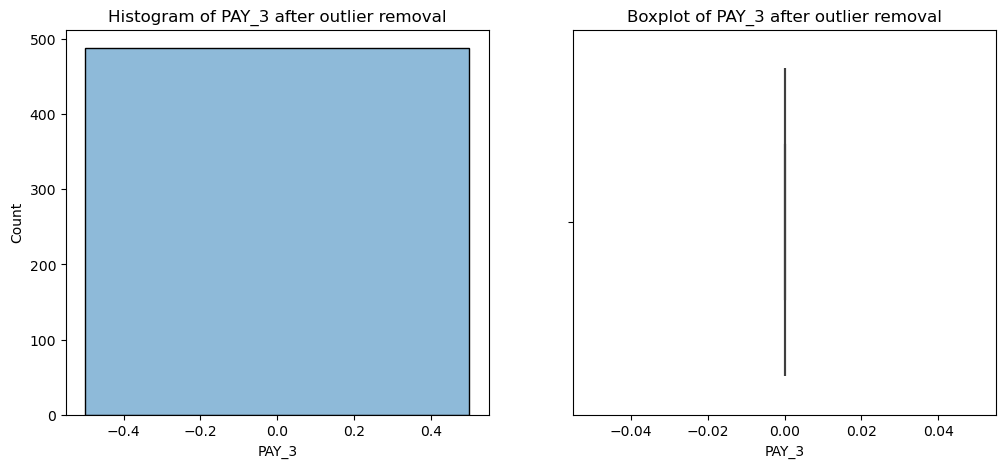

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


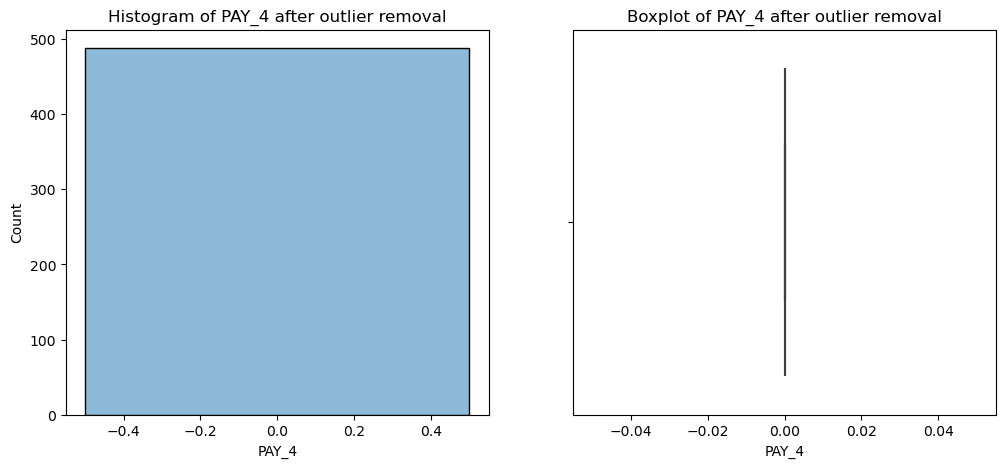

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


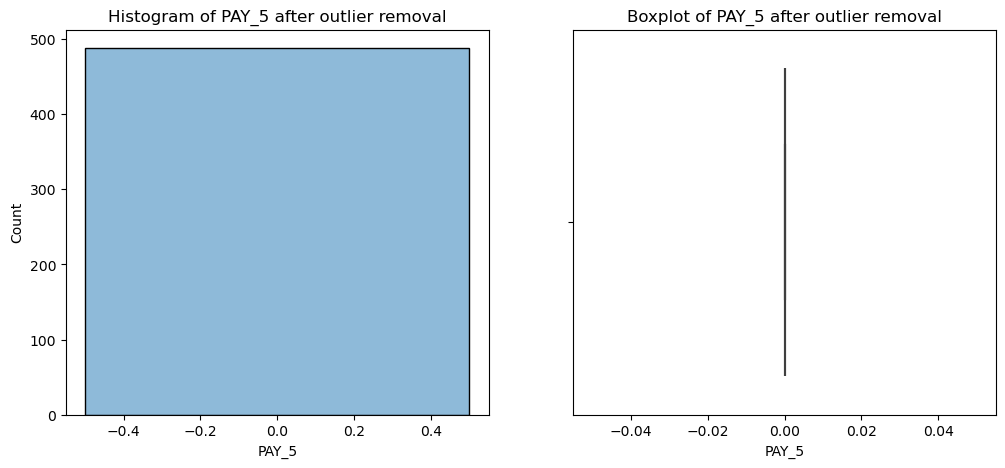

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


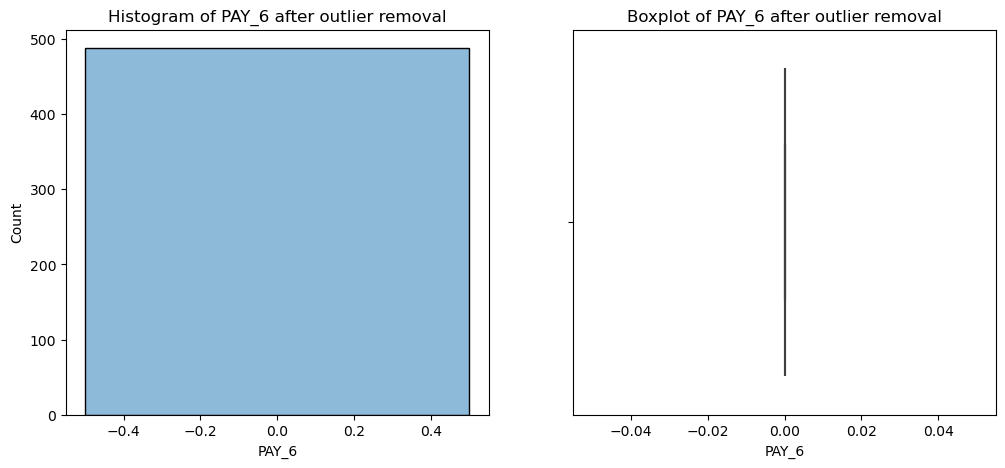

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


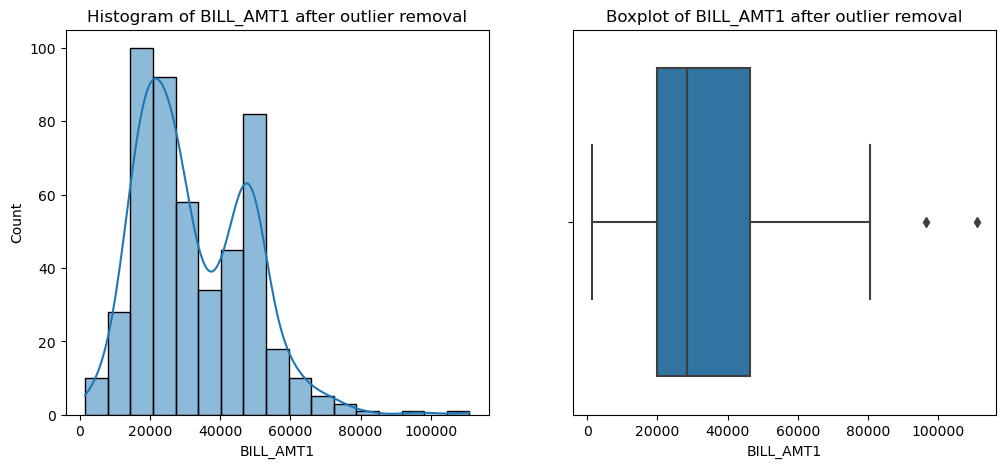

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


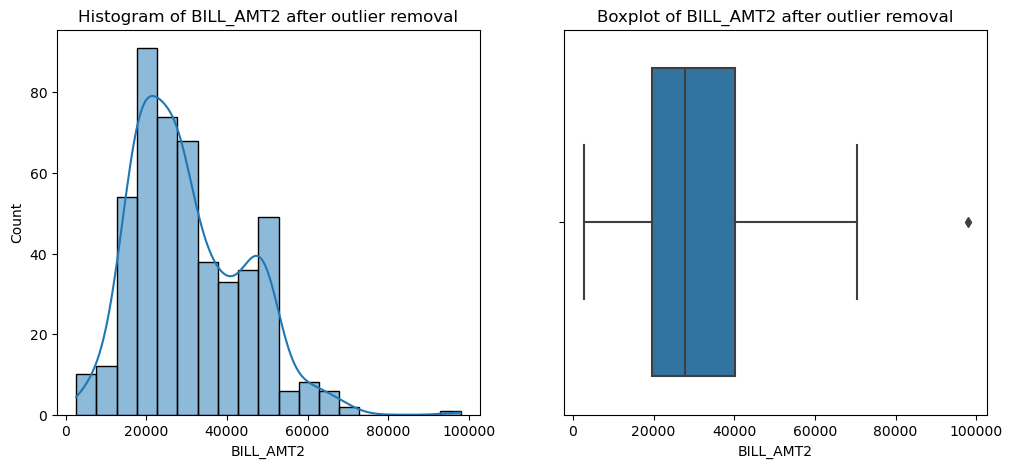

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


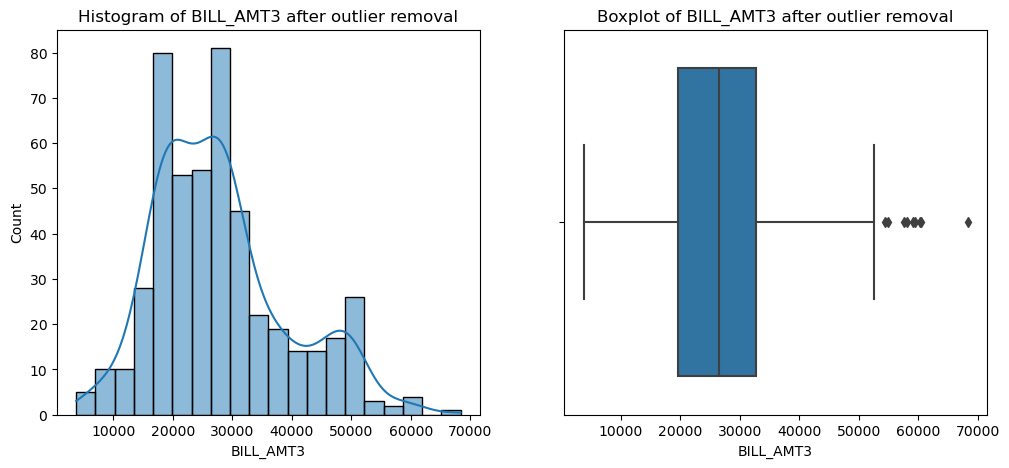

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


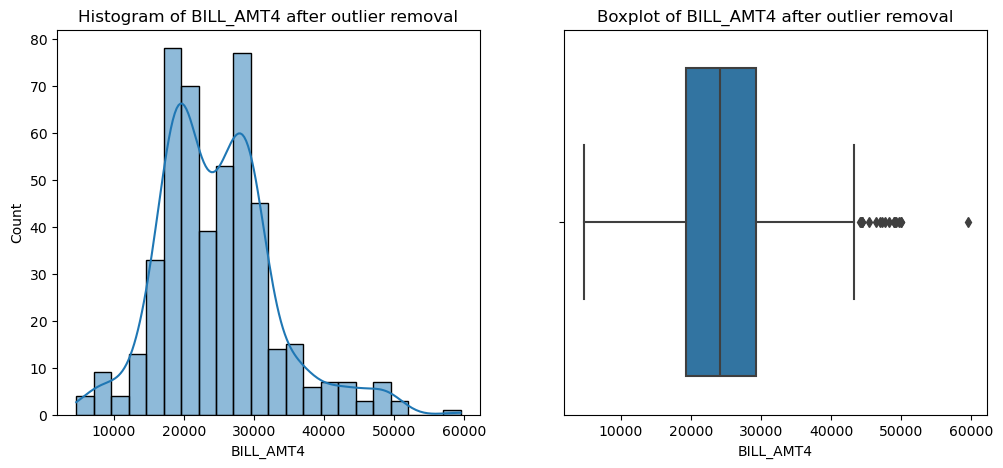

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


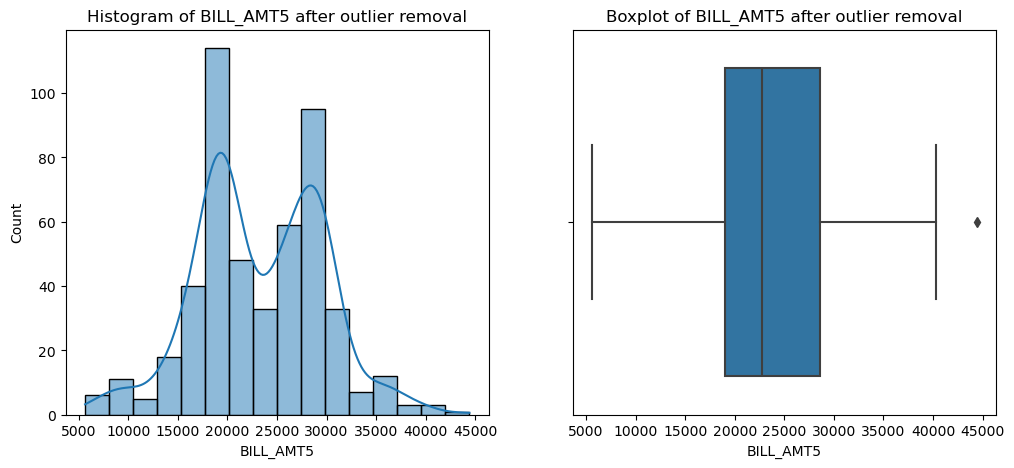

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


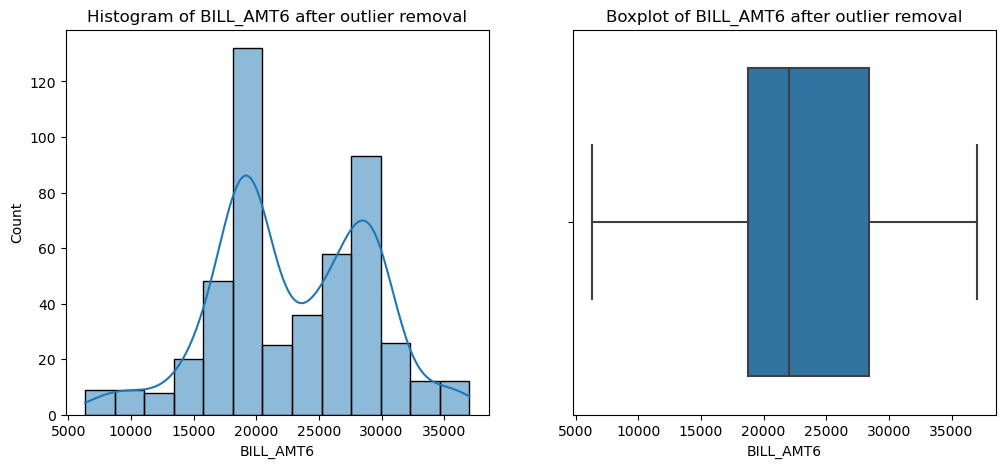

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


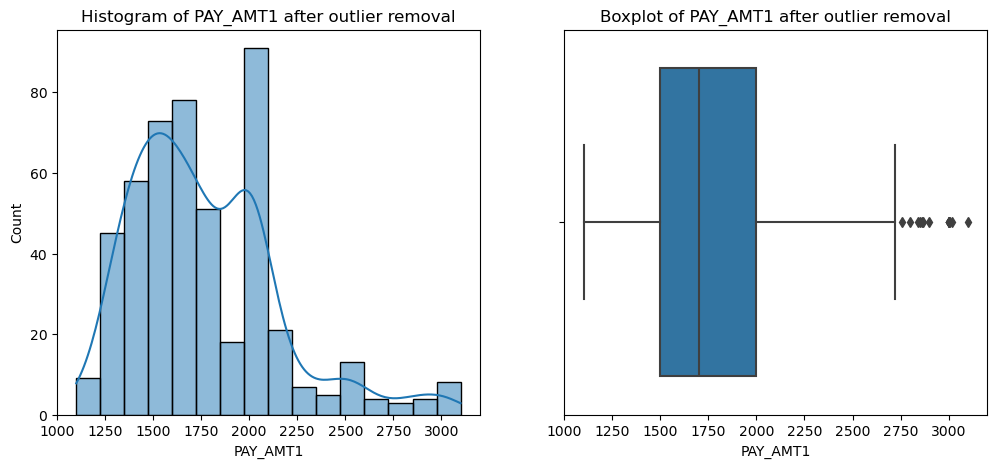

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


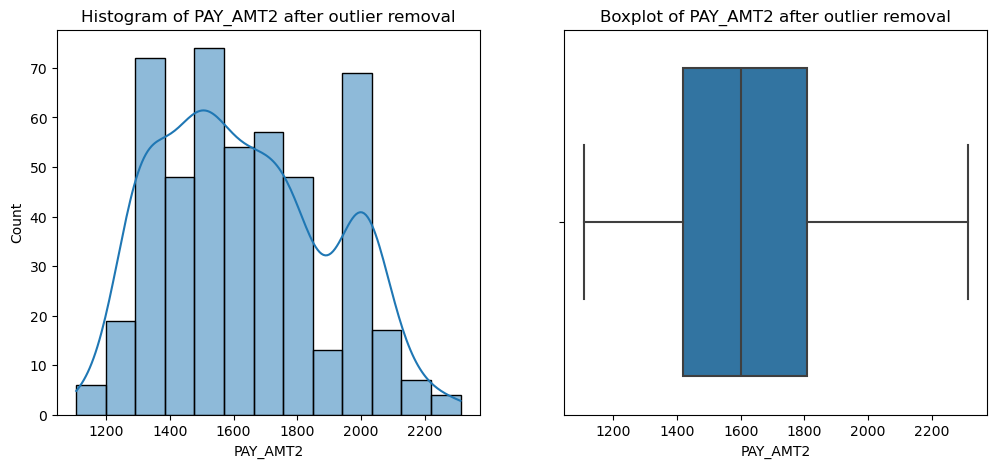

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


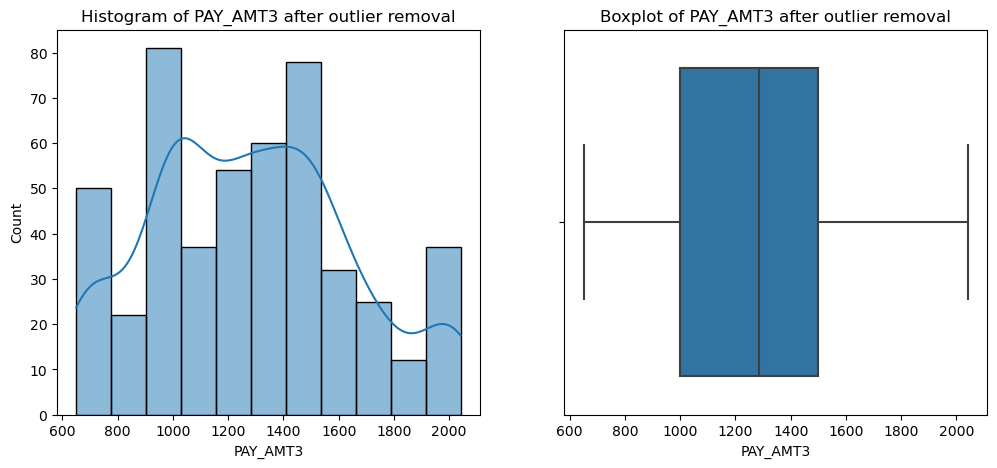

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


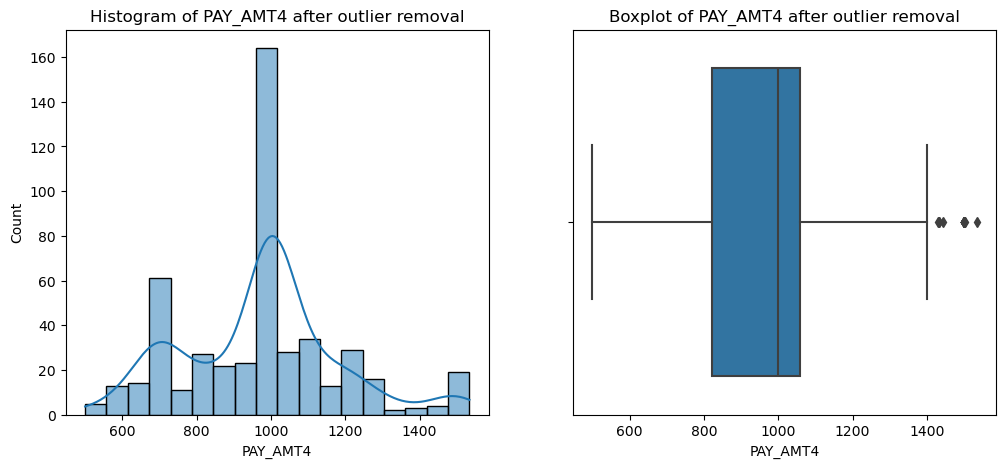

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


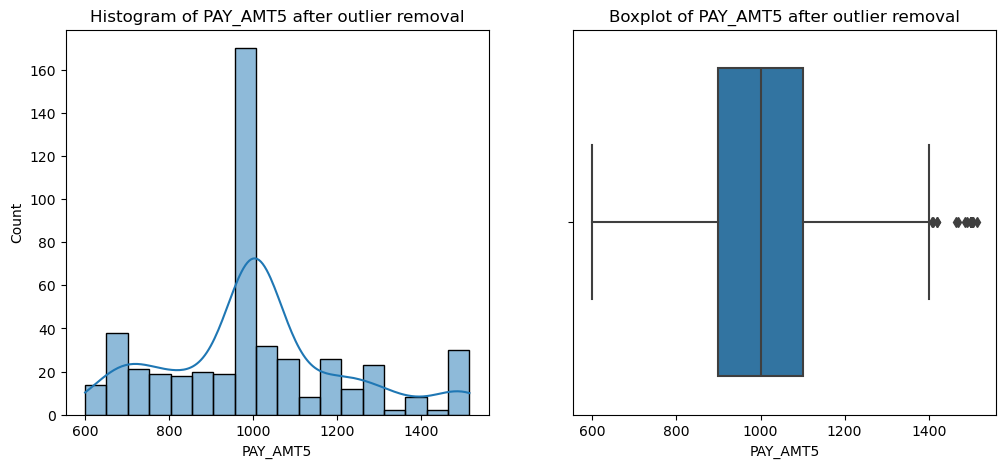

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


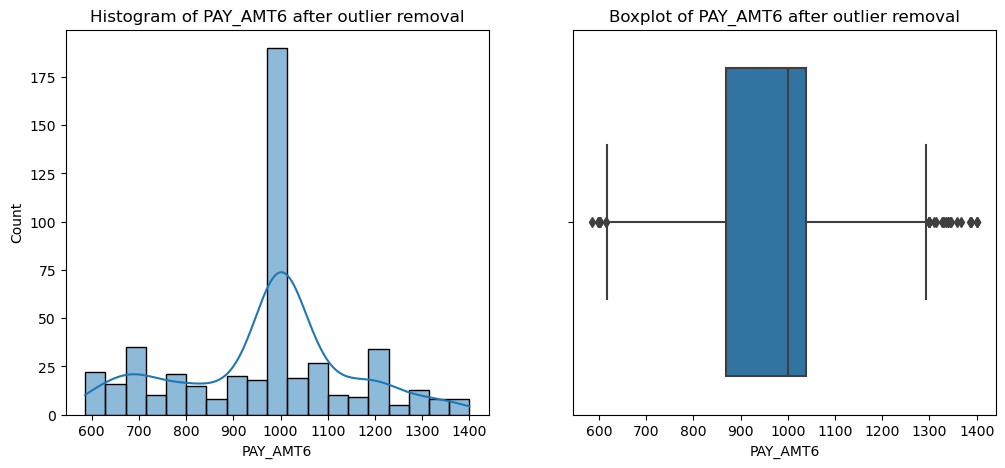

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


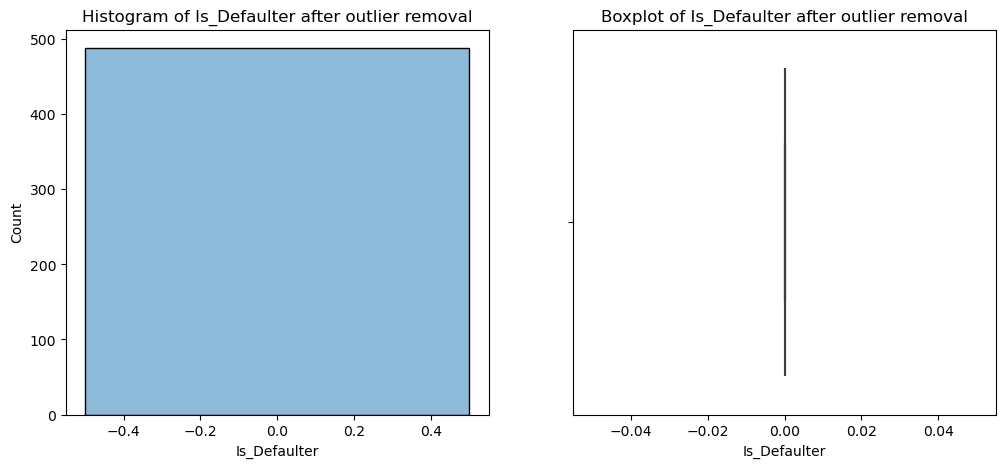

In [45]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - .5 * IQR
    upper_bound = Q3 + .5 * IQR

    # Return a filtered DataFrame that excludes outliers
    return df[(df[column] >= lower_bound) &  (df[column] <= upper_bound)]

# Start with the original data
cleaned_data = df.copy()  # Create a copy for cleaning

# Remove outliers for each numeric column
for column in numeric_columns:
    cleaned_data = remove_outliers_iqr(cleaned_data, column)

# Visualize the cleaned data again to confirm outliers are removed
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_data[column], kde=True)
    plt.title(f'Histogram of {column} after outlier removal')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned_data[column])
    plt.title(f'Boxplot of {column} after outlier removal')

    plt.show()

numerical_features = df1.select_dtypes(include=['float64','int64']).columns

In [47]:
cleaned_data.select_dtypes("number").skew()

LIMIT_BAL       2.031488
SEX            -0.428794
EDUCATION      -0.934181
MARRIAGE       -0.657585
AGE             0.603111
PAY_1          -7.180372
PAY_2           0.000000
PAY_3           0.000000
PAY_4           0.000000
PAY_5           0.000000
PAY_6           0.000000
BILL_AMT1       0.761705
BILL_AMT2       0.757676
BILL_AMT3       0.761657
BILL_AMT4       0.769395
BILL_AMT5      -0.002586
BILL_AMT6      -0.107635
PAY_AMT1        1.060058
PAY_AMT2        0.312020
PAY_AMT3        0.241461
PAY_AMT4        0.285044
PAY_AMT5        0.418539
PAY_AMT6       -0.165333
Is_Defaulter    0.000000
dtype: float64

#### *The dataset is still skewed, so we are applying the Yeo-Johnson transformation.*



#### Yeo-Johnson Transformation
The Yeo-Johnson transformation is a power transformation used to make data more normally distributed, improving symmetry and stabilizing variance. It is similar to the Box-Cox transformation but can handle both positive and negative values.

* Works with both positive and negative values.
* Helps meet the normality assumption for statistical models.
* Used in machine learning and statistical analysis to improve model performance.

In [50]:
from sklearn.preprocessing import PowerTransformer

In [51]:
columns_to_transform = [col for col in num_data if col not in ['Is_Defaulter']]

In [52]:
pt=PowerTransformer(method='yeo-johnson')

In [53]:
df[columns_to_transform] = pt.fit_transform(df[columns_to_transform])

In [54]:
df[columns_to_transform].skew()

LIMIT_BAL   -0.075402
SEX         -0.424183
EDUCATION    0.020768
MARRIAGE    -0.071388
AGE          0.035120
PAY_1        0.030534
PAY_2       -0.012989
PAY_3       -0.000231
PAY_4        0.013038
PAY_5        0.024298
PAY_6        0.031986
BILL_AMT1   -2.448036
BILL_AMT2   -1.310403
BILL_AMT3   -3.235929
BILL_AMT4   -2.821533
BILL_AMT5   -1.323215
BILL_AMT6   -3.025677
PAY_AMT1    -0.133111
PAY_AMT2    -0.112972
PAY_AMT3    -0.151916
PAY_AMT4    -0.165690
PAY_AMT5    -0.178923
PAY_AMT6    -0.175019
dtype: float64

In [55]:
df[columns_to_transform].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  float64
 2   EDUCATION  30000 non-null  float64
 3   MARRIAGE   30000 non-null  float64
 4   AGE        30000 non-null  float64
 5   PAY_1      30000 non-null  float64
 6   PAY_2      30000 non-null  float64
 7   PAY_3      30000 non-null  float64
 8   PAY_4      30000 non-null  float64
 9   PAY_5      30000 non-null  float64
 10  PAY_6      30000 non-null  float64
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [197]:
#checking Correlation
cr = df.corr()
cr

ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.023581   
BILL_AMT2                   0.017982   0.278314 -0.031183   0.018749   
BILL_AMT3                   0.024354   0.283236 -0.024563   0.013002   
BILL_AMT4                   0.040351   0.293988 -0.021880  -0.000451   
BILL_AMT5                   0.016705   0.295562 -0.017005  -0.007567   
BILL_AMT6                   0.016730   0.290389 -0.016733  -0.009099   
PAY_AMT1                    0.009742   0.195236 -0.000242  -0.037456   
PAY_AMT2                    0.008406   0.178408 -0.001391  -0.030038   
PAY_AMT3                    0.039151   0.210167 -0.008597  -0.039943   
PAY_AMT4                    0.007793   0.203242 -0.002229  -0.038218   
PAY_AMT5                    0.000652   0.217202 -0.001667  -0.040358   
PAY_AMT6                    0.003000   0.219595 -0.002766  -0.037200   
default payment next month -0.013952  -0.153520 -0.039961   0.028006   

                            MARRIAGE       AGE     PAY_0     PAY_2     PAY_3  \
ID                         -0.029079  0.018678 -0.030575 -0.011215 -0.018494   
LIMIT_BAL                  -0.108139  0.144713 -0.271214 -0.296382 -0.286123   
SEX                        -0.031389 -0.090874 -0.057643 -0.070771 -0.066096   
EDUCATION                  -0.143464  0.175061  0.105364  0.121566  0.114025   
MARRIAGE                    1.000000 -0.414170  0.019917  0.024199  0.032688   
AGE                        -0.414170  1.000000 -0.039447 -0.050148 -0.053048   
PAY_0                       0.019917 -0.039447  1.000000  0.672164  0.574245   
PAY_2                       0.024199 -0.050148  0.672164  1.000000  0.766552   
PAY_3                       0.032688 -0.053048  0.574245  0.766552  1.000000   
PAY_4                       0.033122 -0.049722  0.538841  0.662067  0.777359   
PAY_5                       0.035629 -0.053826  0.509426  0.622780  0.686775   
PAY_6                       0.034345 -0.048773  0.474553  0.575501  0.632684   
BILL_AMT1                  -0.023472  0.056239  0.187068  0.234887  0.208473   
BILL_AMT2                  -0.021602  0.054283  0.189859  0.235257  0.237295   
BILL_AMT3                  -0.024909  0.053710  0.179785  0.224146  0.227494   
BILL_AMT4                  -0.023344  0.051353  0.179125  0.222237  0.227202   
BILL_AMT5                  -0.025393  0.049345  0.180635  0.221348  0.225145   
BILL_AMT6                  -0.021207  0.047613  0.176980  0.219403  0.222327   
PAY_AMT1                   -0.005979  0.026147 -0.079269 -0.080701  0.001295   
PAY_AMT2                   -0.008093  0.021785 -0.070101 -0.058990 -0.066793   
PAY_AMT3                   -0.003541  0.029247 -0.070561 -0.055901 -0.053311   
PAY_AMT4                   -0.012659  0.021379 -0.064005 -0.046858 -0.046067   
PAY_AMT5                   -0.001205  0.022850 -0.058190 -0.037093 -0.035863   
PAY_AMT6                   -0.006641  0.019478 -0.058673 -0.036500 -0.035861   
default payment next month -0.024339  0.013890  0.324794  0.263551  0.235253   

                               PAY_4     PAY_5     PAY_6  BILL_AMT1  \
ID       

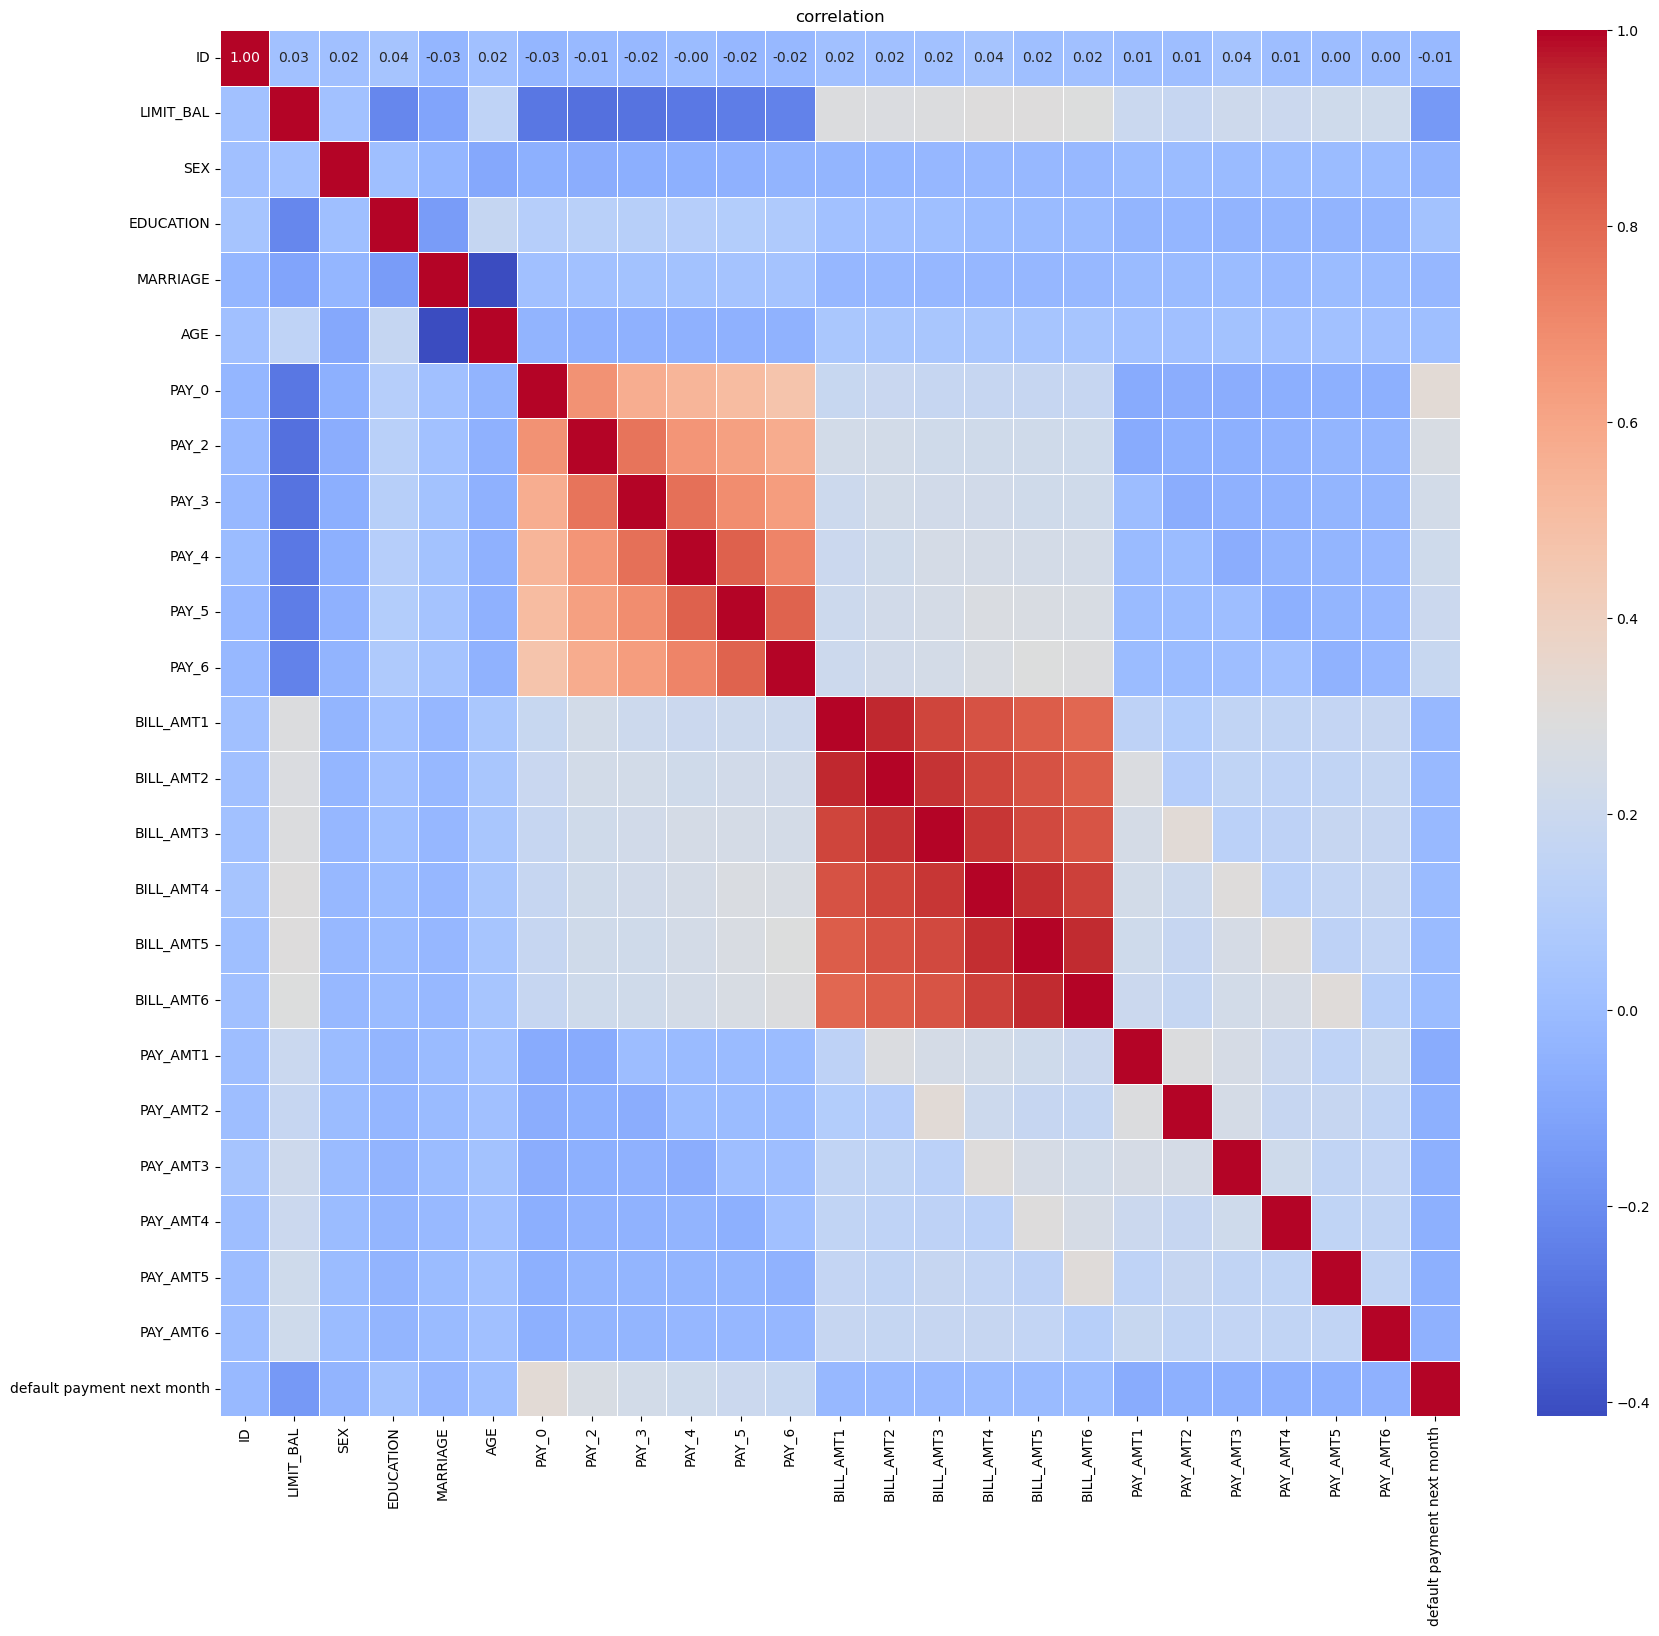

In [199]:
#Visualizing the correlation using a heatmap
plt.figure(figsize=(20,18))
sns.heatmap(cr,annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('correlation')
plt.show()

In [ ]:
annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f"

In [58]:
#checking for replaced labels
df.head()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_1     PAY_2  \
0  -1.665383  0.810161   0.362311 -1.058428 -1.505599  1.662431  1.615503   
1  -0.090364  0.810161   0.362311  0.864100 -1.134225 -0.889837  1.615503   
2  -0.396704  0.810161   0.362311  0.864100  0.016042  0.099856  0.234774   
3  -0.953920  0.810161   0.362311 -1.058428  0.349978  0.099856  0.234774   
4  -0.953920 -1.234323   0.362311 -1.058428  1.862737 -0.889837  0.234774   

      PAY_3     PAY_4     PAY_5     PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
0 -0.683908 -0.653252 -1.761424 -1.700769  -0.654786  -0.666975  -0.703133   
1  0.259846  0.305873  0.340968  1.785357  -0.679304  -0.700056  -0.655283   
2  0.259846  0.305873  0.340968  0.360884  -0.239392  -0.451718  -0.445706   
3  0.259846  0.305873  0.340968  0.360884   0.017236   0.089416   0.119568   
4 -0.683908  0.305873  0.340968  0.360884  -0.568415  -0.611116  -0.082447   

   BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0  -0.708335  -0.705134  -0.656065 -1.724472 -0.347889 -1.629996 -1.578070   
1  -0.624273  -0.604623  -0.580055 -1.724472 -0.202757 -0.080144  0.009080   
2  -0.405640  -0.358103  -0.343748 -0.064485 -0.031718 -0.080144  0.009080   
3  -0.161996  -0.098021  -0.097838  0.063555  0.102920 -0.006222  0.046787   
4  -0.287765  -0.277290  -0.279323  0.063555  1.948535  1.066641  1.057406   

   PAY_AMT5  PAY_AMT6  Is_Defaulter  
0 -1.556978 -1.515825             1  
1 -1.556978  0.332020             1  
2  0.018806  0.741487             0  
3  0.044891  0.059121             0  
4 -0.121440 -0.080835             0

In [59]:
#Value counts of Is_defaulter
df['Is_Defaulter'].value_counts()

Is_Defaulter
0    23364
1     6636
Name: count, dtype: int64

<Axes: xlabel='Is_Defaulter', ylabel='count'>

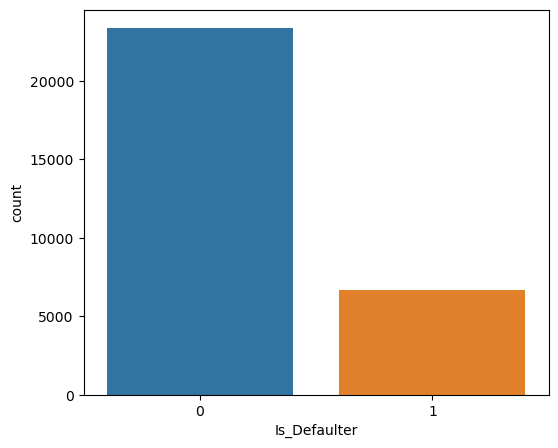

In [60]:
#value count plot for IsDefaulter
plt.figure(figsize=(6,5))
sns.countplot(x = 'Is_Defaulter', data = df)

##### Here we can see defaulters are less as compare to Non defaulter in the given dataset, So we can say that we have imbalanced dataset

### Balancing Imbalanced Data

The target variable **Is_Defaulter** has significant class imbalance, we will apply the *SMOTE (Synthetic Minority Oversampling Technique)**

**SMOTE** is an oversampling technique used to handle imbalanced datasets by generating synthetic samples for the minority class instead of duplicating existing ones.

**Key Features :**
* Reduces overfitting compared to random oversampling.
* Improves classification performance on imbalanced datasets.
* Commonly used in fraud detection, medical diagnosis, and NLP tasks.


In [64]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

X = df.drop('Is_Defaulter', axis=1) # features excluding the target
y = df['Is_Defaulter'] # Target Column

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled_df = pd.DataFrame(X_resampled, columns = X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns =['Is_Defaulter'])

df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

print(df_resampled['Is_Defaulter'].value_counts())

Is_Defaulter
1    23364
0    23364
Name: count, dtype: int64


##### **now the target column is balanced**

In [66]:
df_resampled

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_1     PAY_2  \
0      -1.665383  0.810161   0.362311 -1.058428 -1.505599  1.662431  1.615503   
1      -0.090364  0.810161   0.362311  0.864100 -1.134225 -0.889837  1.615503   
2      -0.396704  0.810161   0.362311  0.864100  0.016042  0.099856  0.234774   
3      -0.953920  0.810161   0.362311 -1.058428  0.349978  0.099856  0.234774   
4      -0.953920 -1.234323   0.362311 -1.058428  1.862737 -0.889837  0.234774   
...          ...       ...        ...       ...       ...       ...       ...   
46723   1.810442  0.810161   0.362311 -1.058428  2.033883  0.749065 -0.715309   
46724  -1.374387 -1.234323  -1.218546  0.864100 -1.690995  0.099856  0.234774   
46725   0.909727 -1.234323  -1.218546  0.077333  0.862618  1.362031  1.615503   
46726   0.770133  0.810161   0.362311  0.864100  0.016042 -0.889837 -0.715309   
46727  -0.483396  0.810161  -0.254051 -1.058428  0.749802  1.662431  1.615503   

          PAY_3     PAY_4     PAY_5     PAY_6  BILL_AMT1  BILL_AMT2  \
0     -0.683908 -0.653252 -1.761424 -1.700769  -0.654786  -0.666975   
1      0.259846  0.305873  0.340968  1.785357  -0.679304  -0.700056   
2      0.259846  0.305873  0.340968  0.360884  -0.239392  -0.451718   
3      0.259846  0.305873  0.340968  0.360884   0.017236   0.089416   
4     -0.683908  0.305873  0.340968  0.360884  -0.568415  -0.611116   
...         ...       ...       ...       ...        ...        ...   
46723 -0.683908 -0.653252 -0.632588 -0.593653  -0.714330  -0.715251   
46724  0.259846  0.305873  0.340968  0.360884  -0.300159  -0.248699   
46725  1.638454  1.710115  1.794684  1.785357   1.407673   1.568669   
46726 -0.683908 -0.653252 -0.632588 -0.593653  -0.672256  -0.671276   
46727  1.638454  1.710115  1.794684  1.785357  -0.005868   0.062383   

       BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      -0.703133  -0.708335  -0.705134  -0.656065 -1.724472 -0.347889   
1      -0.655283  -0.624273  -0.604623  -0.580055 -1.724472 -0.202757   
2      -0.445706  -0.405640  -0.358103  -0.343748 -0.064485 -0.031718   
3       0.119568  -0.161996  -0.098021  -0.097838  0.063555  0.102920   
4      -0.082447  -0.287765  -0.277290  -0.279323  0.063555  1.948535   
...          ...        ...        ...        ...       ...       ...   
46723  -0.669968  -0.660287  -0.673441  -0.635799 -0.189217 -0.078163   
46724  -0.382726  -0.385730  -0.382547  -0.380047 -0.128633  0.064286   
46725   1.578537   1.933354   2.105160   2.221568  1.019534 -1.705383   
46726  -0.636522  -0.622287  -0.603144  -0.582882  0.346691  0.439906   
46727   0.087777   0.154121   0.242282   0.242000  0.077868  0.053052   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Is_Defaulter  
0     -1.629996 -1.578070 -1.556978 -1.515825             1  
1     -0.080144  0.009080 -1.556978  0.332020             1  
2     -0.080144  0.009080  0.018806  0.741487             0  
3     -0.006222  0.046787  0.044891  0.059121             0  
4      1.066641  1.057406 -0.121440 -0.080835             0  
...         ...       ...       ...       ...           ...  
46723 -0.054541 -0.073169 -0.324987  0.203530             1  
46724 -0.257492 -0.207403 -0.278971 -0.223131             1  
46725  1.457350  0.899903  0.900573  0.878947             1  
46726  0.492648  0.553306  0.508623  0.162311             1  
46727  0.185954  0.298006  0.287677  0.354914             1  

[46728 rows x 24 columns]

In [67]:
# Print the resampled data shape
print("\nResampled Data Shape:")
print( df_resampled.shape)


Resampled Data Shape:
(46728, 24)


### Split Data into Training and Testing Sets

In [69]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [70]:
 #Print the shape of the training and testing data
print("Training Data Shape:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting Data Shape:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training Data Shape:
X_train: (37382, 23)
y_train: (37382,)

Testing Data Shape:
X_test: (9346, 23)
y_test: (9346,)


### Feature Selection

**Feature selection** is the process of choosing the most relevant features from a dataset to improve model performance, reduce overfitting, and enhance interpretability. It helps in dimensionality reduction, making models more efficient and faster.

**1. SelectKBest:** 
SelectKBest is a feature selection method in scikit-learn that selects the top k features based on their scores using a specified statistical test. It helps improve model performance by removing irrelevant features.

2. **mutual_info_classif:**
mutual_info_classif is a scoring function that measures the mutual information (MI) between each feature and the target variable. It captures non-linear relationships, making it useful for classification tasks.

In [75]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Calculate mutual information scores
selector = SelectKBest(mutual_info_classif, k='all')
selector.fit(X_train, y_train)

# Get mutual information scores
mutual_info_scores = selector.scores_

# Print mutual information scores
print("Mutual Information Scores:")
for feature, score in zip(X_train.columns, mutual_info_scores):
    print(f"{feature}: {score:.3f}")

# Sort mutual information scores in descending order
sorted_scores = sorted(zip(X_train.columns, mutual_info_scores), key=lambda x: x[1], reverse=True)

# Select top 12 features
top_12_features = [feature for feature, score in sorted_scores[:12]]

print("\nTop 12 Features:")
print(top_12_features)

Mutual Information Scores:
LIMIT_BAL: 0.296
SEX: 0.014
EDUCATION: 0.069
MARRIAGE: 0.017
AGE: 0.306
PAY_1: 0.145
PAY_2: 0.091
PAY_3: 0.072
PAY_4: 0.069
PAY_5: 0.062
PAY_6: 0.063
BILL_AMT1: 0.013
BILL_AMT2: 0.015
BILL_AMT3: 0.013
BILL_AMT4: 0.014
BILL_AMT5: 0.016
BILL_AMT6: 0.013
PAY_AMT1: 0.077
PAY_AMT2: 0.073
PAY_AMT3: 0.074
PAY_AMT4: 0.073
PAY_AMT5: 0.072
PAY_AMT6: 0.072

Top 12 Features:
['AGE', 'LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_AMT1', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT2', 'PAY_3', 'PAY_AMT6', 'PAY_AMT5', 'EDUCATION']


### Insights

*From the mutual information scores:*

* AGE, LIMIT_BAL, PAY_1 and PAY_2 are strongly dependent on the target variable.
* PAY_AMT1, PAY_AMT3 and PAY_AMT2 have moderate dependence.


The top 12 features selected are likely to be the most informative for predicting the target variable.

## Machine Learning Model Building

In [79]:
#importing required libraries for the model implementation
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [80]:
#Select top 12 features 
selector = SelectKBest(mutual_info_classif, k=12)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [81]:
# Defining models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [82]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_train_pred = model.predict(X_train_selected)
    y_test_pred = model.predict(X_test_selected)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"{model_name}:")
    print(f"Training Accuracy: {train_accuracy:.3f}")
    print(f"Testing Accuracy: {test_accuracy:.3f}")
    print()

Logistic Regression:
Training Accuracy: 0.688
Testing Accuracy: 0.684

Support Vector Machine:
Training Accuracy: 0.736
Testing Accuracy: 0.723

Random Forest:
Training Accuracy: 0.999
Testing Accuracy: 0.853

Decision Tree:
Training Accuracy: 0.999
Testing Accuracy: 0.772

K-Nearest Neighbors:
Training Accuracy: 0.852
Testing Accuracy: 0.776

Gradient Boosting:
Training Accuracy: 0.807
Testing Accuracy: 0.805



### Model Performance Comparison

This study evaluates the performance of six machine learning models on a classification task, assessing them based on their training and testing accuracy.

#### Models and Performance

In [201]:
data = {'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors', 'Gradient Boosting'],
        'Training Accuracy': [0.690, 0.737, 0.999, 0.999,0.852,0.805],
        'Testing Accuracy': [0.683, 0.725, 0.859, 0.771, 0.777, 0.801 ]}

df_data = pd.DataFrame(data)
df_data

Model  Training Accuracy  Testing Accuracy
0     Logistic Regression              0.690             0.683
1  Support Vector Machine              0.737             0.725
2           Random Forest              0.999             0.859
3           Decision Tree              0.999             0.771
4     K-Nearest Neighbors              0.852             0.777
5       Gradient Boosting              0.805             0.801

### Insights

**1.Random Forest and Decision Tree**  – Both models achieve nearly perfect training accuracy (0.999) but have significantly lower testing accuracy (0.859 and 0.771, respectively), indicating overfitting.

**2.Gradient Boosting Performs the Best** – It maintains a good balance between training (0.805) and testing (0.801) accuracy, showing strong generalization capability.

**3.K-Nearest Neighbors** – The model achieves 0.852 training accuracy but drops to 0.777 on testing, suggesting it memorizes patterns rather than generalizing well.

**4.SVM and Logistic Regression** – Both models have small gaps between training and testing accuracy (SVM: 0.737 → 0.725, Logistic Regression: 0.690 → 0.683), indicating good stability. However, their overall performance is lower, suggesting they may struggle with capturing complex patterns in the data.

### Regularization

* Regularization is a technique in machine learning used to prevent overfitting by adding a penalty to the loss function. This ensures that the model generalizes well to unseen data. Examples for common types of regularization: L1 (Lasso) and L2 (Ridge).


* Here we applying regularization techniques to all models to prevent overfitting.

In [97]:
models = {
    "Logistic Regression": LogisticRegression(penalty='l2', solver='lbfgs', max_iter=500),
    "Support Vector Machine": SVC(kernel='linear', C=0.1),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=10),
    "Decision Tree": DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, min_samples_split=10),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05)
}

# Apply regularization and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluation
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Printing the results
    print(f"{model_name}:")
    print(f"Train_Accuracy: {train_accuracy}")
    print(f"Test_Accuracy: {test_accuracy}")
    print()

Logistic Regression:
Train_Accuracy: 0.6934620940559627
Test_Accuracy: 0.6814680077038305

Support Vector Machine:
Train_Accuracy: 0.6987052592156653
Test_Accuracy: 0.6875668735287823

Random Forest:
Train_Accuracy: 0.7943395216949334
Test_Accuracy: 0.7650331692702761

Decision Tree:
Train_Accuracy: 0.7379487453854796
Test_Accuracy: 0.7408517012625723

K-Nearest Neighbors:
Train_Accuracy: 0.8201273340110213
Test_Accuracy: 0.7626792210571367

Gradient Boosting:
Train_Accuracy: 0.8062703975175218
Test_Accuracy: 0.799700406591055



#### Explanations

**1. Logistic Regression:**

* Uses L2 regularization (ridge penalty).
* Optimized with the 'lbfgs' solver.
* Maximum of 500 iterations.

**2. Support Vector Machine (SVC):**
* Uses a linear kernel.
* Regularization parameter C=0.1

**3. Random Forest Classifier:**
* Uses 50 decision trees.
* Features are chosen using the square root of the total feature count.
* Maximum tree depth is 10.

**4. Decision Tree Classifier:**
* Uses cost-complexity pruning with alpha=0.001
* Maximum depth of 10.
* Requires at least 10 samples to split a node.

**5. K-Nearest Neighbors (KNN):**

* Uses 10 neighbors for classification.

**6. Gradient Boosting Classifier:**

* Uses 200 trees.
* Learning rate of 0.05.


### Model Performance Comparison

In [203]:
new_data = {'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors', 'Gradient Boosting'],
        'Previous Training Accuracy': [0.690, 0.737, 0.999, 0.999,0.852,0.805],
        'Regularized Training Accuracy': [0.6934620940559627, 0.6987052592156653, 0.7943395216949334, 0.7379487453854796, 0.8201273340110213, 0.8062703975175218],
        'Previous Testing Accuracy': [0.683, 0.725, 0.859, 0.771, 0.777, 0.801 ],
        'Regularized Testing Accuracy': [0.6814680077038305,0.6875668735287823, 0.7650331692702761,  0.7408517012625723, 0.7626792210571367, 0.799700406591055]}

df_new_data = pd.DataFrame(new_data)
df_new_data

Model  Previous Training Accuracy  \
0     Logistic Regression                       0.690   
1  Support Vector Machine                       0.737   
2           Random Forest                       0.999   
3           Decision Tree                       0.999   
4     K-Nearest Neighbors                       0.852   
5       Gradient Boosting                       0.805   

   Regularized Training Accuracy  Previous Testing Accuracy  \
0                       0.693462                      0.683   
1                       0.698705                      0.725   
2                       0.794340                      0.859   
3                       0.737949                      0.771   
4                       0.820127                      0.777   
5                       0.806270                      0.801   

   Regularized Testing Accuracy  
0                      0.681468  
1                      0.687567  
2                      0.765033  
3                      0.740852  
4                      0.762679  
5                      0.799700

### Insights

* Regularization reduced overfitting in Random Forest and Decision Tree, as their training accuracy dropped significantly (from 0.999 to 0.794 and 0.737, respectively), while test accuracy remained more stable.

* Gradient Boosting remained stable, with minimal change in training and testing accuracy, indicating it was already well-regularized before applying additional constraints.

* Logistic Regression and Support Vector Machine showed minor changes, with slight increases in training accuracy but slight decreases in test accuracy, suggesting that regularization had little impact on their performance.

*  K-Nearest Neighbors saw a slight decline in accuracy, possibly due to reduced model complexity affecting its ability to fit the data.


### Model Evaluation : Classification Matrics

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1-score: {f1_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

Logistic Regression:
Accuracy: 0.6814680077038305
Precision: 0.6961122613296526
Recall: 0.6463049978641606
F1-score: 0.6702846383874183
Confusion Matrix:
[[3343 1321]
 [1656 3026]]

Support Vector Machine:
Accuracy: 0.6875668735287823
Precision: 0.7331921651667549
Recall: 0.5916275096112772
F1-score: 0.6548463356973995
Confusion Matrix:
[[3656 1008]
 [1912 2770]]

Random Forest:
Accuracy: 0.7663171410228975
Precision: 0.8215756951596292
Recall: 0.6815463477146518
F1-score: 0.7450385243987858
Confusion Matrix:
[[3971  693]
 [1491 3191]]

Decision Tree:
Accuracy: 0.7408517012625723
Precision: 0.7508880994671403
Recall: 0.7223408799658265
F1-score: 0.7363379055083822
Confusion Matrix:
[[3542 1122]
 [1300 3382]]

K-Nearest Neighbors:
Accuracy: 0.7626792210571367
Precision: 0.7342205323193917
Recall: 0.8248611704399829
F1-score: 0.7769060551196942
Confusion Matrix:
[[3266 1398]
 [ 820 3862]]

Gradient Boosting:
Accuracy: 0.799700406591055
Precision: 0.8660760812923397
Recall: 0.709953011533

In [207]:
comparison = {
    "Model": [
        "Logistic Regression", "Support Vector Machine", "Random Forest",
        "Decision Tree", "K-Nearest Neighbors", "Gradient Boosting"],
    "Accuracy": [0.6815, 0.6876, 0.7663, 0.7409, 0.7627, 0.7997],
    "Precision": [0.6961, 0.7332, 0.8216, 0.7509, 0.7342, 0.8661],
    "Recall": [0.6463, 0.5916, 0.6815, 0.7223, 0.8249, 0.7099],
    "F1-score": [0.6703, 0.6548, 0.7450, 0.7363, 0.7769, 0.7803]
}
df_comparison = pd.DataFrame(comparison)
df_comparison

Model  Accuracy  Precision  Recall  F1-score
0     Logistic Regression    0.6815     0.6961  0.6463    0.6703
1  Support Vector Machine    0.6876     0.7332  0.5916    0.6548
2           Random Forest    0.7663     0.8216  0.6815    0.7450
3           Decision Tree    0.7409     0.7509  0.7223    0.7363
4     K-Nearest Neighbors    0.7627     0.7342  0.8249    0.7769
5       Gradient Boosting    0.7997     0.8661  0.7099    0.7803

In [209]:
df_comparison.sort_values(by=['Accuracy'], ascending=False)

Model  Accuracy  Precision  Recall  F1-score
5       Gradient Boosting    0.7997     0.8661  0.7099    0.7803
2           Random Forest    0.7663     0.8216  0.6815    0.7450
4     K-Nearest Neighbors    0.7627     0.7342  0.8249    0.7769
3           Decision Tree    0.7409     0.7509  0.7223    0.7363
1  Support Vector Machine    0.6876     0.7332  0.5916    0.6548
0     Logistic Regression    0.6815     0.6961  0.6463    0.6703

#### Insights

**1. Gradient Boosting is the Best Performing Model**

* It has the highest accuracy (0.7997), F1-Score (0.7803) and precision (0.8661), making it the top choice for this dataset.

* It balances recall and precision well, ensuring good generalization.

**2. Random Forest Performs Well but is Slightly Overfitting**

* With accuracy of 0.7663 and a strong F1-score of 0.7450, it is a solid performer.
  
* However, its recall is lower than KNN (0.6815 vs. 0.8249), which means it may miss some positive cases.

**3. K-Nearest Neighbors Has Strong Recall but Lower Precision**

* KNN achieves the highest recall (0.8249), meaning it detects most positive cases.

* However, its precision is lower (0.7342), leading to more false positives.

**4. Decision Tree Performs Moderately Well**

* With accuracy of 0.7409 and F1-score of 0.7363, it performs decently but isn't the best.
  
* Trees tend to overfit, but regularization can improve them.

**5. Logistic Regression & SVM Underperform Compared to Others**

* Logistic Regression has the lowest accuracy (0.6815), meaning it struggles with complex patterns.

* SVM slightly improves (0.6876 accuracy), but its recall (0.5916) is lower, meaning it misses more positive cases.

##### * Here **Gradient Boosting** is the best performing model with accuracy (0.7997), F1-Score (0.7803) and precision (0.8661).

### **Hyperparameter Tuning**

Hyperparameter tuning is the process of selecting the best set of hyperparameters to optimize a machine learning model's performance. Unlike model parameters (learned from data), hyperparameters are set manually before training.

* Improves Accuracy – Finds the best settings for better predictions.

* Prevents Overfitting/Underfitting – Balances model complexity.

*  Enhances Generalization – Ensures the model works well on unseen data.

* GridSearchCV, RandomizedSearchCV, and Bayesian Optimization are some methods for hyperparameter tuning.

* Since hyperparameter tuning is time-consuming, it's better to focus on models that show promising performance. Here, we only perform hyperparameter tuning on **Gradient Boosting** using GridSearchCV.

In [217]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the Gradient Boosting model
gbc = GradientBoostingClassifier()

# Define hyperparameters to tune
gbc_params = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'subsample': [0.8, 1.0],  # Fraction of samples used for training each tree
}

# Perform GridSearchCV
gbc_grid = GridSearchCV(gbc, gbc_params, cv=5, n_jobs=-1, verbose=2)
gbc_grid.fit(X_train, y_train)

# Get the best model, best parameters, and accuracy
best_gbc = gbc_grid.best_estimator_
best_gbc_params = gbc_grid.best_params_
gbc_accuracy = accuracy_score(y_test, best_gbc.predict(X_test))

# Print results
print(f"Best Gradient Boosting Model: {best_gbc}")
print(f"Best Parameters: {best_gbc_params}")
print(f"Accuracy: {gbc_accuracy:.4f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Gradient Boosting Model: GradientBoostingClassifier(max_depth=7, n_estimators=300)
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Accuracy: 0.8764


### Insights 

* Before tuning, Gradient Boosting had an accuracy of 0.7997, which improved to 0.8764 after hyperparameter tuning, making it the best-performing model among all.

* Optimizing learning rate, n_estimators, max_depth, and subsample helped balance bias and variance, leading to better generalization.